#**Đề bài 2: Customer_Churn_Banker**

# Package import

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import ClassPredictionError

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install yellowbrick

# Problem Statment

Các ngân hàng đều muốn giữ chân khách hàng của mình để duy trì hoạt động kinh doanh và ngân hàng Đa quốc gia ABC cũng muốn điều đó.
Dưới đây là dữ liệu khách hàng của các khách hàng tại Ngân hàng Đa quốc gia ABC có phát sinh giao dịch và mục đích của dữ liệu sẽ là dự đoán Tỷ lệ khách hàng rời bỏ.
Giả sử bạn là Data Analyst cho ngân hàng ABC. BOD đang cố gắng tìm hiểu xem tại sao lại xảy ra vấn đề trên và liệu người dùng các dịch vụ có rời bỏ ABC hay không (hủy sử dụng dịch vụ) trong vài ngày tới.
> Có thể thấy đây là bộ dữ liệu khá mở, vì vậy có thể ứng dụng các mô hình ML một cách linh hoạt, trong đó thuật toán Clustering sẽ được dùng trong quá trình khai khá dữ liệu - EDA

**Mục tiêu (Objective)**
Xây dựng một mô hình phân loại để dự đoán liệu khách hàng có rời bỏ ngân hàng hay không (churn status: 1 = rời bỏ, 0 = không rời bỏ).

**Định tính:**
1. Các yếu tố nào ảnh hưởng đến việc khách hàng rời bỏ ngân hàng?
2. Khách hàng thuộc nhóm nào có tỷ lệ rời bỏ cao nhất (ví dụ: quốc gia, nhóm tuổi)?

**Định lượng:**
1. Đây là bài toán phân loại, vậy mô hình nào sẽ phù hợp? (Logistic Regression, Random Forest, XGBoost, v.v.)
2. Những đặc trưng (features) nào có ảnh hưởng lớn nhất đến việc dự đoán tỷ lệ churn?

**Phân tích thăm dò dữ liệu (EDA)**
- Tỷ lệ churn trong tập dữ liệu: Bao nhiêu phần trăm khách hàng rời bỏ?
- Phân phối nhân khẩu học: Độ tuổi, quốc gia, giới tính nào có tỷ lệ rời bỏ cao?
- Hành vi giao dịch: Khách hàng có điểm tín dụng thấp hoặc số dư tài khoản thấp có dễ rời bỏ hơn không?

**1. Xây dựng mô hình phân loại để dự đoán tỷ lệ churn (Khách hàng rời bỏ)**  
- Khách hàng nào rời bỏ dịch vụ của ngân hàng ABC?  
- Mô hình phân loại nào sẽ giúp dự đoán tỷ lệ churn chính xác?  
  - Sử dụng các mô hình phân loại như Logistic Regression, Random Forest, XGBoost, hoặc Support Vector Machine (SVM) để dự đoán tỷ lệ churn của khách hàng.  
  - Mô hình sẽ phân tích các yếu tố như độ tuổi, thâm niên, tài khoản, số lượng sản phẩm và tình trạng khách hàng để xác định những khách hàng có nguy cơ rời bỏ.

  **Dữ liệu cần thiết**:  
  - Cột `credit_score`, `country`, `gender`, `age`, `tenure`, `balance`, `products_number`, `credit_card`, `active_member`, `estimated_salary`, và `churn`.  

  **Kỹ thuật sử dụng**:  
  - Thử nghiệm các mô hình khác nhau như Random Forest, LightGBM, v.v, ...

  **Đo lường hiệu suất**:  
  - Sử dụng các chỉ số như Accuracy, Precision, Recall, F1-Score, và ROC-AUC để đánh giá hiệu quả của mô hình.

**2. Phân tích các yếu tố ảnh hưởng đến việc khách hàng rời bỏ (Feature Importance)**  
- Những yếu tố nào ảnh hưởng mạnh nhất đến quyết định churn của khách hàng?  
  - Sử dụng mô hình Random Forest để xác định tính quan trọng của các đặc trưng.  
  - Áp dụng phương pháp để loại bỏ các đặc trưng không quan trọng, giúp cải thiện hiệu suất mô hình.

**Kỹ thuật sử dụng**:  
  - **Feature Importance** từ Random Forest hoặc XGBoost.  
  - **Decision Tree** để hình dung mối quan hệ giữa các đặc trưng và tỷ lệ churn.

**3. Phân nhóm khách hàng theo tỷ lệ churn để thiết kế chiến lược chăm sóc (Segmentation)**   
- Khách hàng có tỷ lệ churn cao và thấp được phân nhóm như thế nào?  
- Các nhóm khách hàng này có đặc điểm gì nổi bật và cần chăm sóc đặc biệt?  
  - Sử dụng các phương pháp phân cụm như **K-means Clustering** hoặc **DBSCAN** để phân nhóm khách hàng theo các đặc điểm như tuổi, giới tính, số dư tài khoản và số lượng sản phẩm.  
  - Sau khi phân nhóm, có thể thiết kế các chiến lược chăm sóc đặc biệt cho các nhóm có tỷ lệ churn cao.

**Kỹ thuật sử dụng**:  
  - **K-means Clustering** hoặc **DBSCAN** để phân nhóm khách hàng.  
  - **Hierarchical Clustering** để tạo cây phân cụm.

**4. Dự báo tỷ lệ churn theo từng nhóm khách hàng (Customer Segments)**  
- Làm thế nào để dự đoán tỷ lệ churn cho các nhóm khách hàng khác nhau?  
  - Sử dụng các mô hình như **Logistic Regression**, **Random Forest**, hoặc **Gradient Boosting** để dự đoán tỷ lệ churn cho từng phân khúc khách hàng đã được phân loại từ bài toán phân cụm.

**Dữ liệu cần thiết**:  
  - Các cột `age`, `balance`, `products_number`, `active_member`, `churn` từ mỗi nhóm đã phân loại.  

**Kỹ thuật sử dụng**:  
  - **Logistic Regression** hoặc **Random Forest** để dự đoán tỷ lệ churn.  
  - **Gradient Boosting** để dự đoán churn chính xác hơn với dữ liệu phức tạp.

**5. Phát hiện các khách hàng có nguy cơ rời bỏ sớm (Early Warning System)**  
- Làm thế nào để phát hiện những khách hàng có nguy cơ rời bỏ sớm trong vòng 30 ngày tới?  
  - Dự đoán churn sớm với các mô hình như **Logistic Regression**, **Random Forest**, hoặc **LightGBM**.  
  - Tạo các tính năng thời gian như số tháng từ khi khách hàng tham gia để dự đoán churn trong một khoảng thời gian ngắn.

**Kỹ thuật sử dụng**:  
- **Time-based Features** để tạo các tính năng thời gian.  
- **Cross-validation** để tối ưu hóa mô hình và tránh overfitting.

# Tìm hiểu về data - EDA

In [ ]:
#Kết nối file ở google drive:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataRaw = pd.read_csv("/content/drive/MyDrive/finaltestlv3/Customer_Churn_Banker.csv")
dataRaw.head()

customer_id  credit_score country  gender  age  tenure   balance  \
0     15634602           619  France  Female   42       2         0   
1     15647311           608   Spain  Female   41       1   8380786   
2     15619304           502  France  Female   42       8   1596608   
3     15701354           699  France  Female   39       1         0   
4     15737888           850   Spain  Female   43       2  12551082   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1          10134888      1  
1                1            0              1          11254258      0  
2                3            1              0          11393157      1  
3                2            0              0           9382663      0  
4                1            1              1            790841      0

In [ ]:
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   credit_score      10000 non-null  int64 
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   tenure            10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products_number   10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   active_member     10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


In [ ]:
dataRaw.isin([np.inf, -np.inf]).any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

**Note**:

1. Bộ dữ liệu này gồm 12 cột, và 10.000 quan sát được thu thập từ khách hàng của Ngân hàng Đa quốc gia ABC.
2. Tạm thời chưa thấy cột dữ liệu nào bị rỗng (chứa null).
3. Không có cột nào chứa dữ liệu dạng infinity.
4. Hầu hết kiểu dữ liệu đều khá sạch, đều là int64 hoặc float64. Chỉ còn lại:
- Cột country và gender có dạng string (danh mục).
- Tất cả các cột còn lại đều đã được mã hóa hoặc có kiểu số.
> Cần phải xử lý hoặc mã hóa lại các cột dạng string như country và gender, chuyển chúng thành dạng số để dễ dàng xử lý trong các mô hình học máy.

In [ ]:
# 1. Nhóm thông tin khách hàng
col_custInfo = ['customer_id', 'country', 'gender', 'age', 'tenure']
print(f"Nhóm thông tin khách hàng: \n{col_custInfo}")

# 2. Nhóm thông tin tài chính (Financial Attributes)
col_financial = ['credit_score', 'balance', 'estimated_salary']
print(f"Nhóm thông tin tài chính: \n{col_financial}")

# 3. Nhóm thông tin sử dụng dịch vụ (Product Usage)
col_product_usage = ['products_number', 'credit_card', 'active_member']
print(f"Nhóm thông tin sử dụng dịch vụ: \n{col_product_usage}")

# 4. Target Variable 'churn' là biến mục tiêu cho bài toán dự đoán churn

Nhóm thông tin khách hàng: 
['customer_id', 'country', 'gender', 'age', 'tenure']
Nhóm thông tin tài chính: 
['credit_score', 'balance', 'estimated_salary']
Nhóm thông tin sử dụng dịch vụ: 
['products_number', 'credit_card', 'active_member']


### Kiểm tra thông tin khách hàng

In [ ]:
dataRaw["customer_id"].duplicated().any()

False

In [ ]:
dataRaw[col_custInfo].describe()

customer_id           age        tenure
count  1.000000e+04  10000.000000  10000.000000
mean   1.569094e+07     38.921800      5.012800
std    7.193619e+04     10.487806      2.892174
min    1.556570e+07     18.000000      0.000000
25%    1.562853e+07     32.000000      3.000000
50%    1.569074e+07     37.000000      5.000000
75%    1.575323e+07     44.000000      7.000000
max    1.581569e+07     92.000000     10.000000

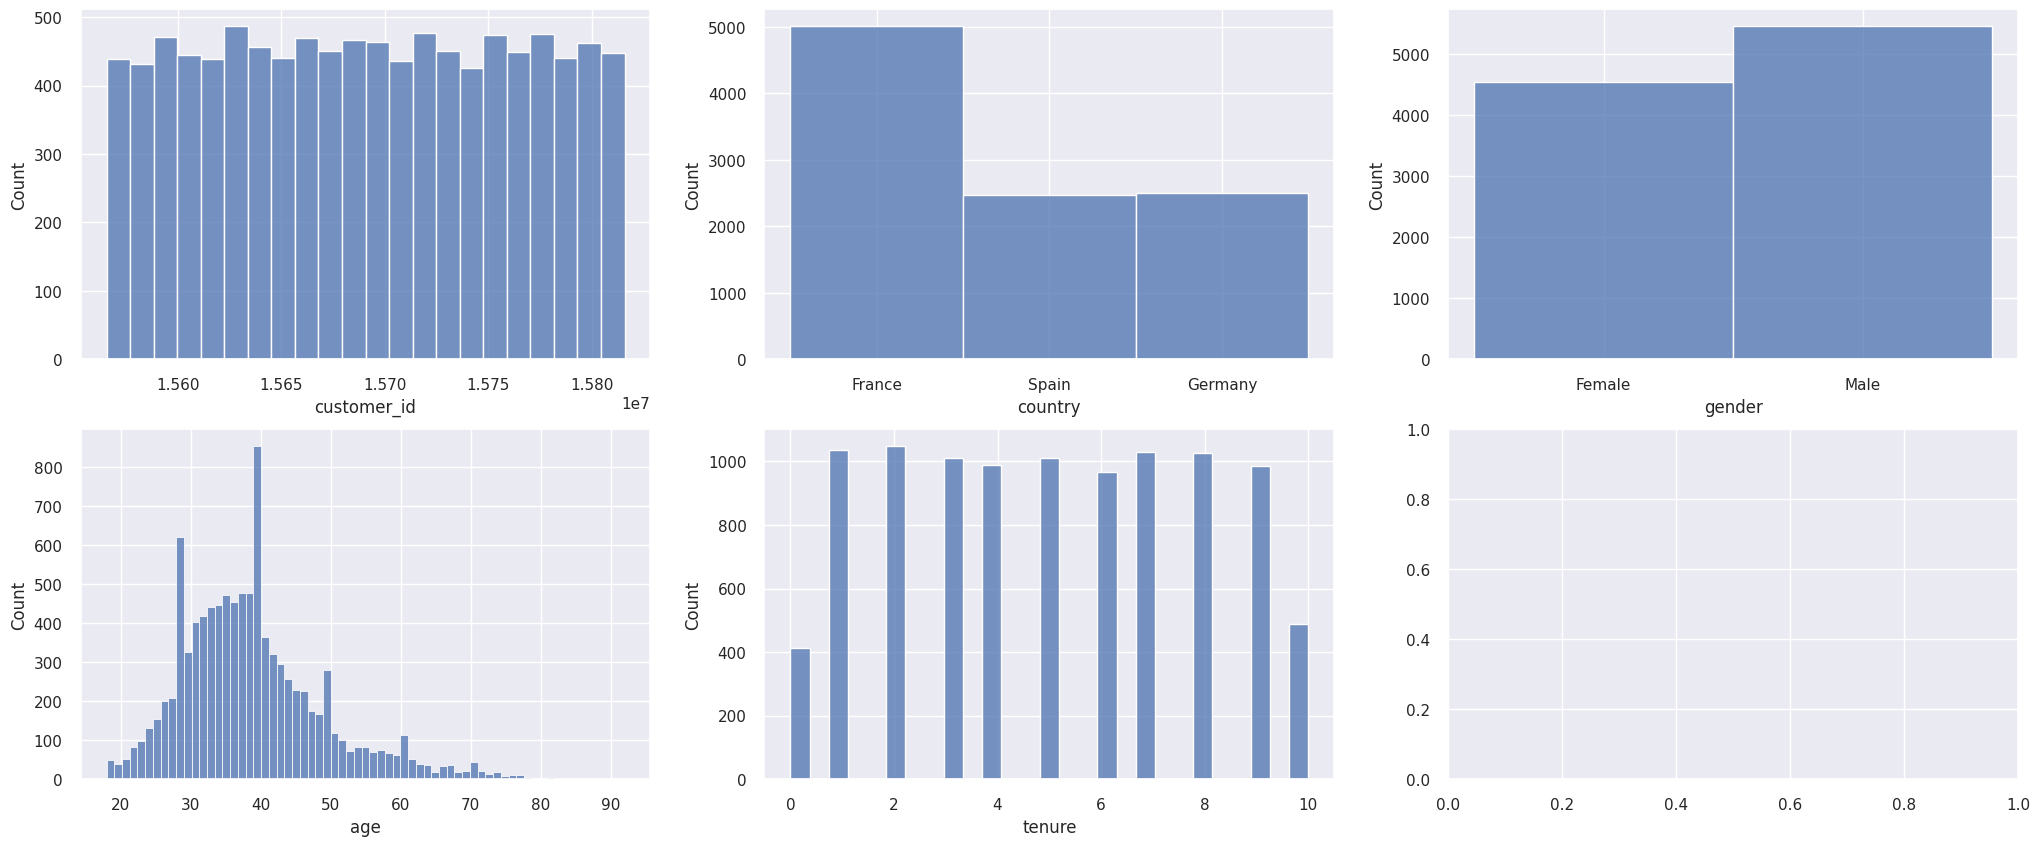

customer_id           age        tenure
count  1.000000e+04  10000.000000  10000.000000
mean   1.569094e+07     38.921800      5.012800
std    7.193619e+04     10.487806      2.892174
min    1.556570e+07     18.000000      0.000000
25%    1.562853e+07     32.000000      3.000000
50%    1.569074e+07     37.000000      5.000000
75%    1.575323e+07     44.000000      7.000000
max    1.581569e+07     92.000000     10.000000

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize= (25,10))

for col, ax in zip(col_custInfo, axes.flat):
    sns.histplot(dataRaw[col], ax=ax)
plt.show()
dataRaw[col_custInfo].describe()

>Age:
- Giá trị nhỏ nhất (min) là 18: Có vẻ hợp lý vì đây là độ tuổi tối thiểu để mở tài khoản ngân hàng.
- Giá trị lớn nhất (max) là 92: Có thể là hợp lệ nhưng cần kiểm tra ngoại lai (outliers) với độ tuổi cao.

> Tenure: min chưa đầy 1 năm, max là 10 năm

> Phân phối dữ liệu có vẻ khá chuẩn (dựa vào mean gần median).

<Axes: >

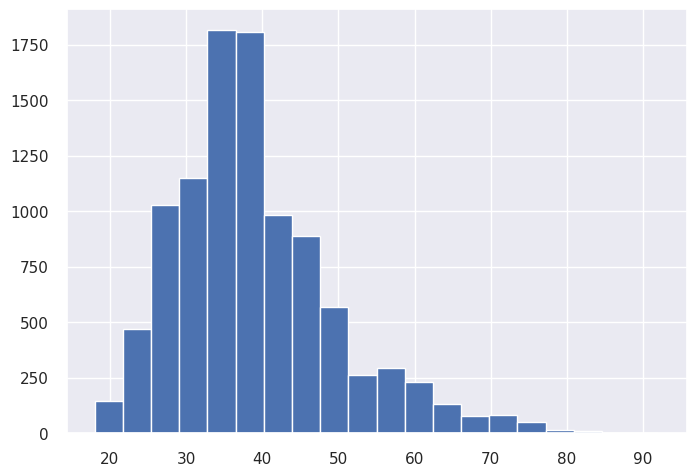

In [ ]:
dataRaw['age'].hist(bins=20)


> Làm sạch lại dữ liệu liên quan đến ```Age```. Cân nhắc sử dụng *IQR Range* để loại bỏ outlier.

In [ ]:
def removeOutlierIQR(dataIn: pd.DataFrame, columns: list):
    """Hàm loại bỏ outlier sử dụng IQR Range

    Args:
        dataIn (pd.DataFrame): Dữ liệu đầu vào
        columns (list): Danh sách các cột cần loại bỏ outliers

    Returns:
        pd.DataFrame: Dữ liệu sau khi đã loại bỏ outliers
    """
    for column in columns:
        # Kiểm tra nếu cột có kiểu số học
        if dataIn[column].dtype in ['float64', 'int64']:
            # Tính Q1, Q3, IQR
            Q1 = dataIn[column].quantile(0.25)
            Q3 = dataIn[column].quantile(0.75)
            IQR = Q3 - Q1

            # Xác định điều kiện lọc outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Lọc dữ liệu, loại bỏ outliers
            dataIn = dataIn[(dataIn[column] >= lower_bound) & (dataIn[column] <= upper_bound)]

    # Trả về dữ liệu sau khi loại bỏ outliers
    return dataIn

# Áp dụng hàm loại bỏ outliers cho cột 'Age'
dataRaw = removeOutlierIQR(dataRaw, ['age'])

# Kiểm tra lại mô tả sau khi làm sạch dữ liệu
print(dataRaw['age'].describe())


count    9641.000000
mean       37.791723
std         8.803124
min        18.000000
25%        32.000000
50%        37.000000
75%        43.000000
max        62.000000
Name: age, dtype: float64


Số lượng mẫu (count): 9641, nghĩa là một số mẫu đã bị loại bỏ trong quá trình làm sạch dữ liệu.

Giá trị trung bình (mean): 37.79, giảm nhẹ so với giá trị trung bình trước đó (38.92),chứng tỏ một số giá trị ngoài phạm vi đã bị loại bỏ.

Độ lệch chuẩn (std): 8.80, giảm so với trước, cho thấy sự phân tán của dữ liệu giảm sau khi loại bỏ outliers.

Min, 25%, 50%, 75%, Max: Giá trị min là 18, và giá trị max đã được giới hạn ở 62 (trước đó là 92). Giá trị ngoài phạm vi (trên 62) đã bị loại bỏ.

In [ ]:
dataRaw['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
dataRaw['country'].value_counts()

country
France     4832
Germany    2425
Spain      2384
Name: count, dtype: int64

In [ ]:
dataRaw['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
dataRaw['gender'].value_counts()

gender
Male      5265
Female    4376
Name: count, dtype: int64

Bỏ bớt các cột không đem lại nhiều thông tin
> Bỏ bớt cột ID vì không cần thiết

Số lượng giá trị duy nhất ít (2,3 giá trị), dễ dàng mã hóa (encoding) nếu cần dùng cho mô hình.
> Mã hóa dữ liệu cột country quốc gia

> Mã hóa dữ liệu cột giới tính gender

In [ ]:
# Xóa các cột không cần thiết
col_custInfo.remove('customer_id')

In [ ]:
dataRaw.describe()

customer_id  credit_score          age       tenure       balance  \
count  9.641000e+03   9641.000000  9641.000000  9641.000000  9.641000e+03   
mean   1.569091e+07    650.287626    37.791723     5.015351  6.993265e+06   
std    7.184667e+04     96.691920     8.803124     2.888878  6.286653e+06   
min    1.556570e+07    350.000000    18.000000     0.000000  0.000000e+00   
25%    1.562842e+07    583.000000    32.000000     3.000000  0.000000e+00   
50%    1.569100e+07    652.000000    37.000000     5.000000  8.707023e+06   
75%    1.575295e+07    717.000000    43.000000     7.000000  1.246556e+07   
max    1.581569e+07    850.000000    62.000000    10.000000  2.508981e+07   

       products_number  credit_card  active_member  estimated_salary  \
count      9641.000000  9641.000000    9641.000000      9.641000e+03   
mean          1.530962     0.705217       0.503164      9.100815e+06   
std           0.581617     0.455969       0.500016      6.126970e+06   
min           1.000000     0.000000       0.000000      5.230000e+02   
25%           1.000000     0.000000       0.000000      3.338942e+06   
50%           1.000000     1.000000       1.000000      8.904846e+06   
75%           2.000000     1.000000       1.000000      1.440006e+07   
max           4.000000     1.000000       1.000000      1.999925e+07   

             churn  
count  9641.000000  
mean      0.203713  
std       0.402779  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

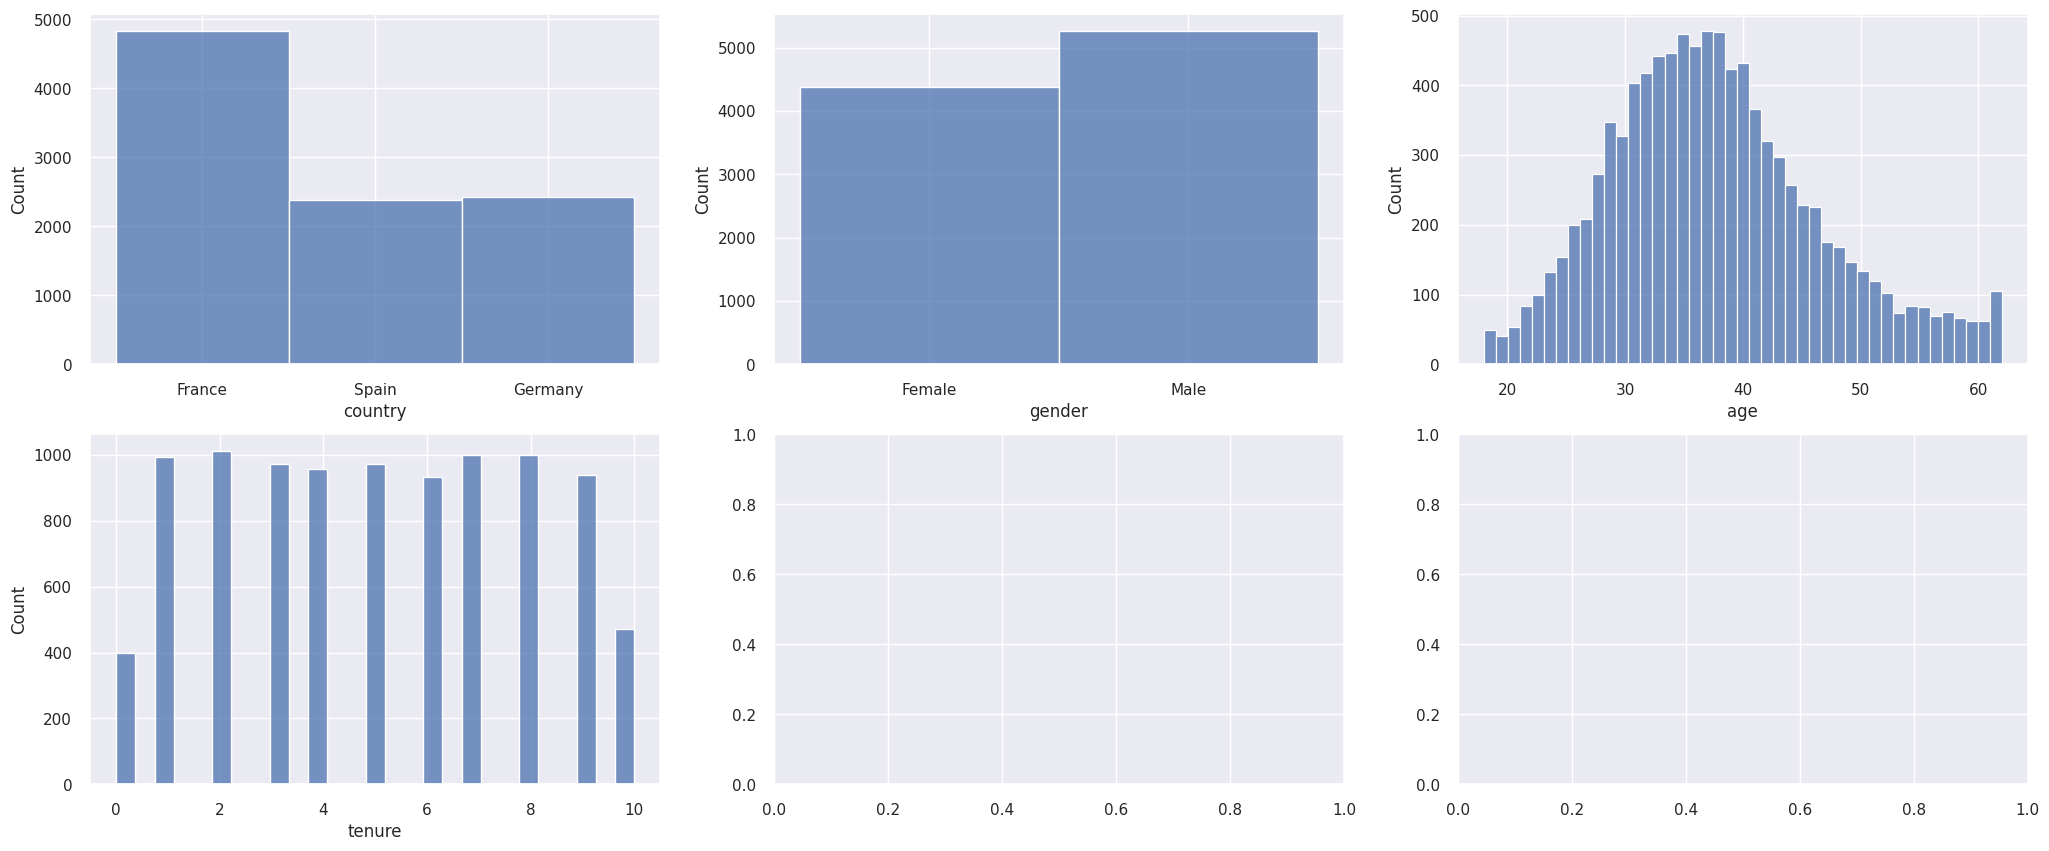

age       tenure
count  9641.000000  9641.000000
mean     37.791723     5.015351
std       8.803124     2.888878
min      18.000000     0.000000
25%      32.000000     3.000000
50%      37.000000     5.000000
75%      43.000000     7.000000
max      62.000000    10.000000

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize= (25,10))

for col, ax in zip(col_custInfo, axes.flat):
    sns.histplot(dataRaw[col], ax=ax)
plt.show()
dataRaw[col_custInfo].describe()

In [ ]:
# Tính số lượng khách hàng sử dụng dịch vụ trong mỗi năm
dataRaw.groupby('tenure').size()

tenure
0      397
1      992
2     1011
3      972
4      958
5      972
6      931
7     1000
8      998
9      939
10     471
dtype: int64

1. Phân bố theo quốc gia: Khách hàng chủ yếu đến từ Pháp, chiếm số lượng lớn nhất trong tập dữ liệu. Tây Ban Nha và Đức có số lượng khách hàng ít hơn, gần như tương đương nhau.

2. Giới tính: Số lượng khách hàng nam nhỉnh hơn khách hàng nữ một chút.

3. Phân bố độ tuổi:
- Độ tuổi khách hàng tập trung trong khoảng 30 đến 40 tuổi, với đỉnh rơi vào độ tuổi khoảng 35-40 tuổi.
- Số lượng giảm dần ở các nhóm tuổi trẻ hơn (dưới 30) và già hơn (trên 50).

4. Thâm niên (tenure): Thời gian gắn bó với dịch vụ trải đều từ 0 đến 10 năm. Nhóm thâm niên 3-8 năm chiếm số lượng lớn hơn so với nhóm thâm niên ngắn hạn (0-2 năm).

5. Thống kê chi tiết:
 • Nhóm trẻ nhất là 18 tuổi, lớn nhất là 62 tuổi.
 • Phân bố tuổi tập trung vào khoảng 32-43 tuổi (25%-75%).
 • Thâm niên trung bình là 5 năm, độ lệch chuẩn là 2.89 năm.
 • Thâm niên phổ biến nhất là khoảng 3-7 năm.

> Kết luận:
- Nhóm khách hàng chủ yếu là nam giới, đến từ Pháp, trong độ tuổi trung bình 30-40 và có thâm niên sử dụng dịch vụ từ 3 đến 7 năm.
- Sự chênh lệch không lớn giữa các giới tính và quốc gia (trừ Pháp chiếm ưu thế).

### Kiểm tra dữ liệu financial

In [ ]:
dataRaw[col_financial].describe()

credit_score       balance  estimated_salary
count   9641.000000  9.641000e+03      9.641000e+03
mean     650.287626  6.993265e+06      9.100815e+06
std       96.691920  6.286653e+06      6.126970e+06
min      350.000000  0.000000e+00      5.230000e+02
25%      583.000000  0.000000e+00      3.338942e+06
50%      652.000000  8.707023e+06      8.904846e+06
75%      717.000000  1.246556e+07      1.440006e+07
max      850.000000  2.508981e+07      1.999925e+07

**NOTE**

> credit_score:

- Giá trị min là 350 và max là 850, cho thấy dải giá trị này nằm trong phạm vi hợp lý của điểm tín dụng.
- Trung bình (mean) là khoảng 650 và độ lệch chuẩn khá cao (96.69), cho thấy có thể có sự phân tán lớn trong điểm tín dụng.

> balance:

- Giá trị min là 0, điều này có thể có nghĩa là một số khách hàng có số dư tài khoản bằng 0 hoặc chưa có giao dịch.
- Trung bình (mean) là khoảng 6.99 triệu, và độ lệch chuẩn khá cao (6.29 triệu), cho thấy sự phân tán lớn trong số dư tài khoản của khách hàng.
- Giá trị max là 25 triệu, điều này cần được xem xét để xác định xem có phải là giá trị ngoại lệ không.

> estimated_salary:

- Giá trị min là 523, điều này có vẻ là hợp lý với lương ước tính của khách hàng.
- Trung bình (mean) là 9.1 triệu và độ lệch chuẩn 6.13 triệu, cho thấy lương ước tính cũng có sự phân tán lớn.
- Giá trị max là 20 triệu, điều này có thể là hợp lý đối với những khách hàng có mức lương cao.

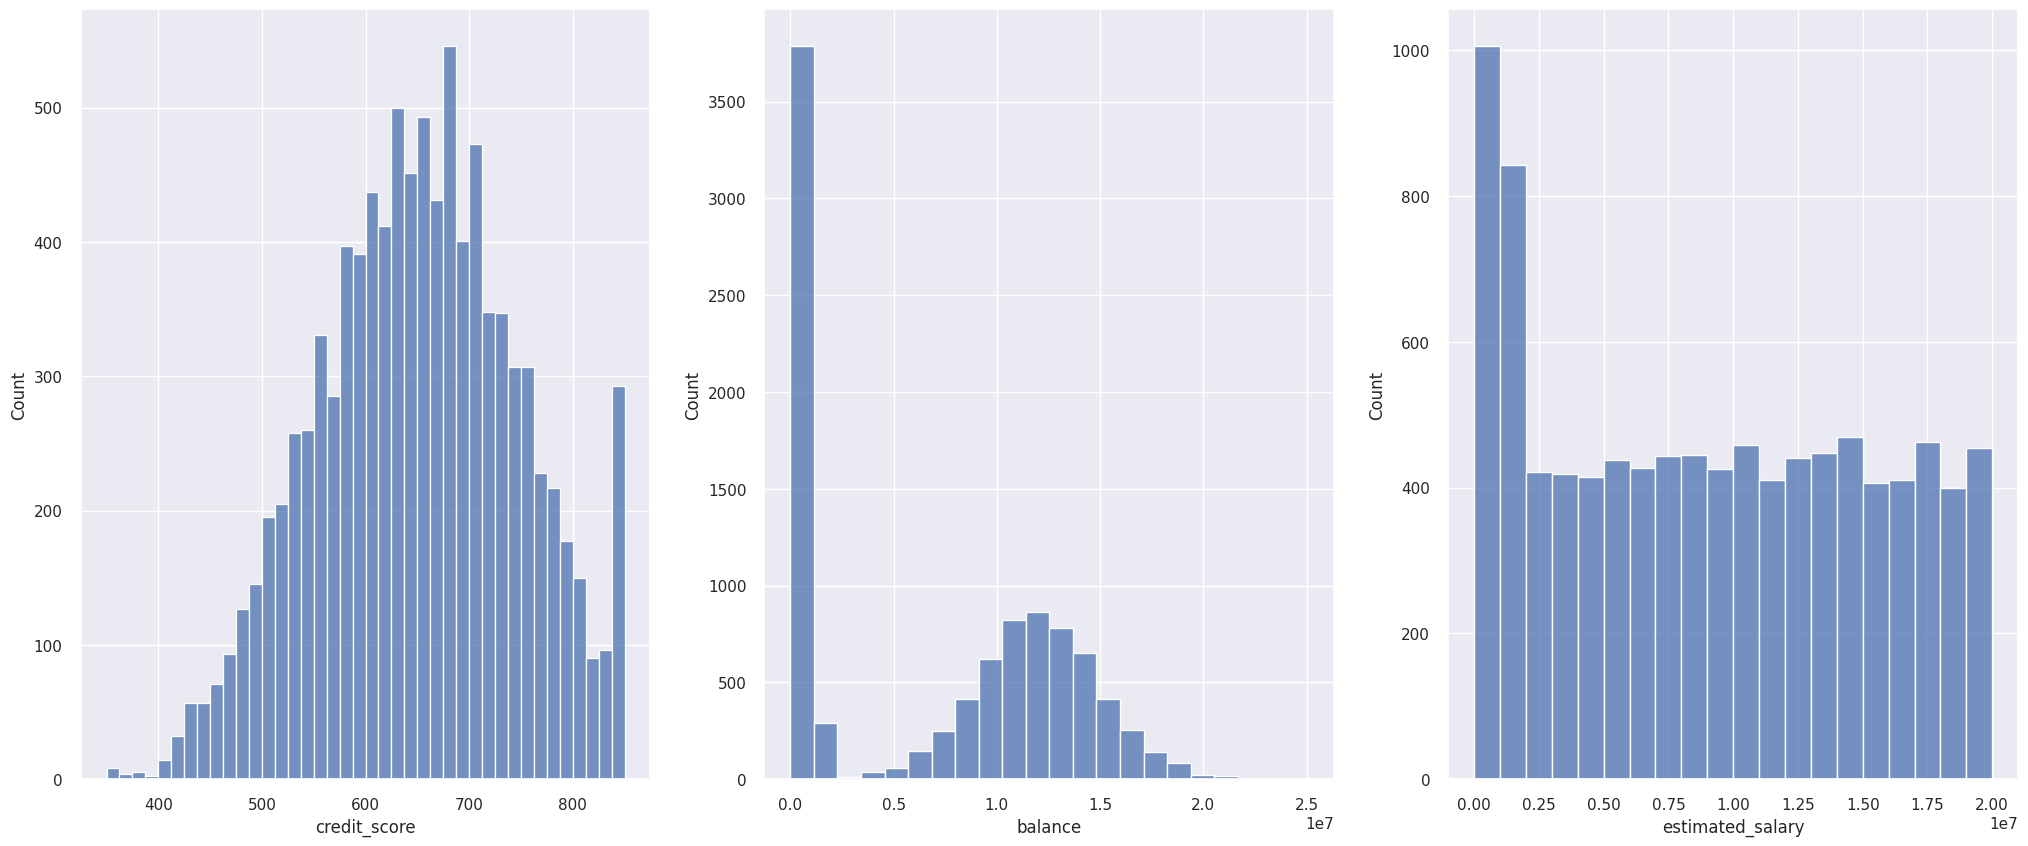

credit_score       balance  estimated_salary
count   9641.000000  9.641000e+03      9.641000e+03
mean     650.287626  6.993265e+06      9.100815e+06
std       96.691920  6.286653e+06      6.126970e+06
min      350.000000  0.000000e+00      5.230000e+02
25%      583.000000  0.000000e+00      3.338942e+06
50%      652.000000  8.707023e+06      8.904846e+06
75%      717.000000  1.246556e+07      1.440006e+07
max      850.000000  2.508981e+07      1.999925e+07

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize= (25,10))

for col, ax in zip(col_financial, axes.flat):
    sns.histplot(dataRaw[col], ax=ax)
plt.show()
dataRaw[col_financial].describe()

In [ ]:
def removeOutlierIQR(dataIn: pd.DataFrame, columns: list):
    """Hàm loại bỏ outlier sử dụng IQR Range

    Args:
        dataIn (pd.DataFrame): Dữ liệu đầu vào
        columns (list): Danh sách các cột cần loại bỏ outliers

    Returns:
        pd.DataFrame: Dữ liệu sau khi đã loại bỏ outliers
    """
    for column in columns:
        # Kiểm tra nếu cột có kiểu số học
        if dataIn[column].dtype in ['float64', 'int64']:
            # Tính Q1, Q3, IQR
            Q1 = dataIn[column].quantile(0.25)
            Q3 = dataIn[column].quantile(0.75)
            IQR = Q3 - Q1

            # Xác định điều kiện lọc outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Lọc dữ liệu, loại bỏ outliers
            dataIn = dataIn[(dataIn[column] >= lower_bound) & (dataIn[column] <= upper_bound)]

    # Trả về dữ liệu sau khi loại bỏ outliers
    return dataIn

# Áp dụng hàm loại bỏ outliers cho các cột 'credit_score', 'balance', 'estimated_salary'
dataRaw = removeOutlierIQR(dataRaw, ['credit_score', 'balance', 'estimated_salary'])

# Kiểm tra lại mô tả sau khi làm sạch dữ liệu
print(dataRaw[['credit_score', 'balance', 'estimated_salary']].describe())


       credit_score       balance  estimated_salary
count   9627.000000  9.627000e+03      9.627000e+03
mean     650.709982  6.991046e+06      9.094402e+06
std       96.124546  6.286194e+06      6.127766e+06
min      382.000000  0.000000e+00      5.230000e+02
25%      584.000000  0.000000e+00      3.331872e+06
50%      652.000000  8.692086e+06      8.899205e+06
75%      717.000000  1.246230e+07      1.439808e+07
max      850.000000  2.508981e+07      1.999925e+07


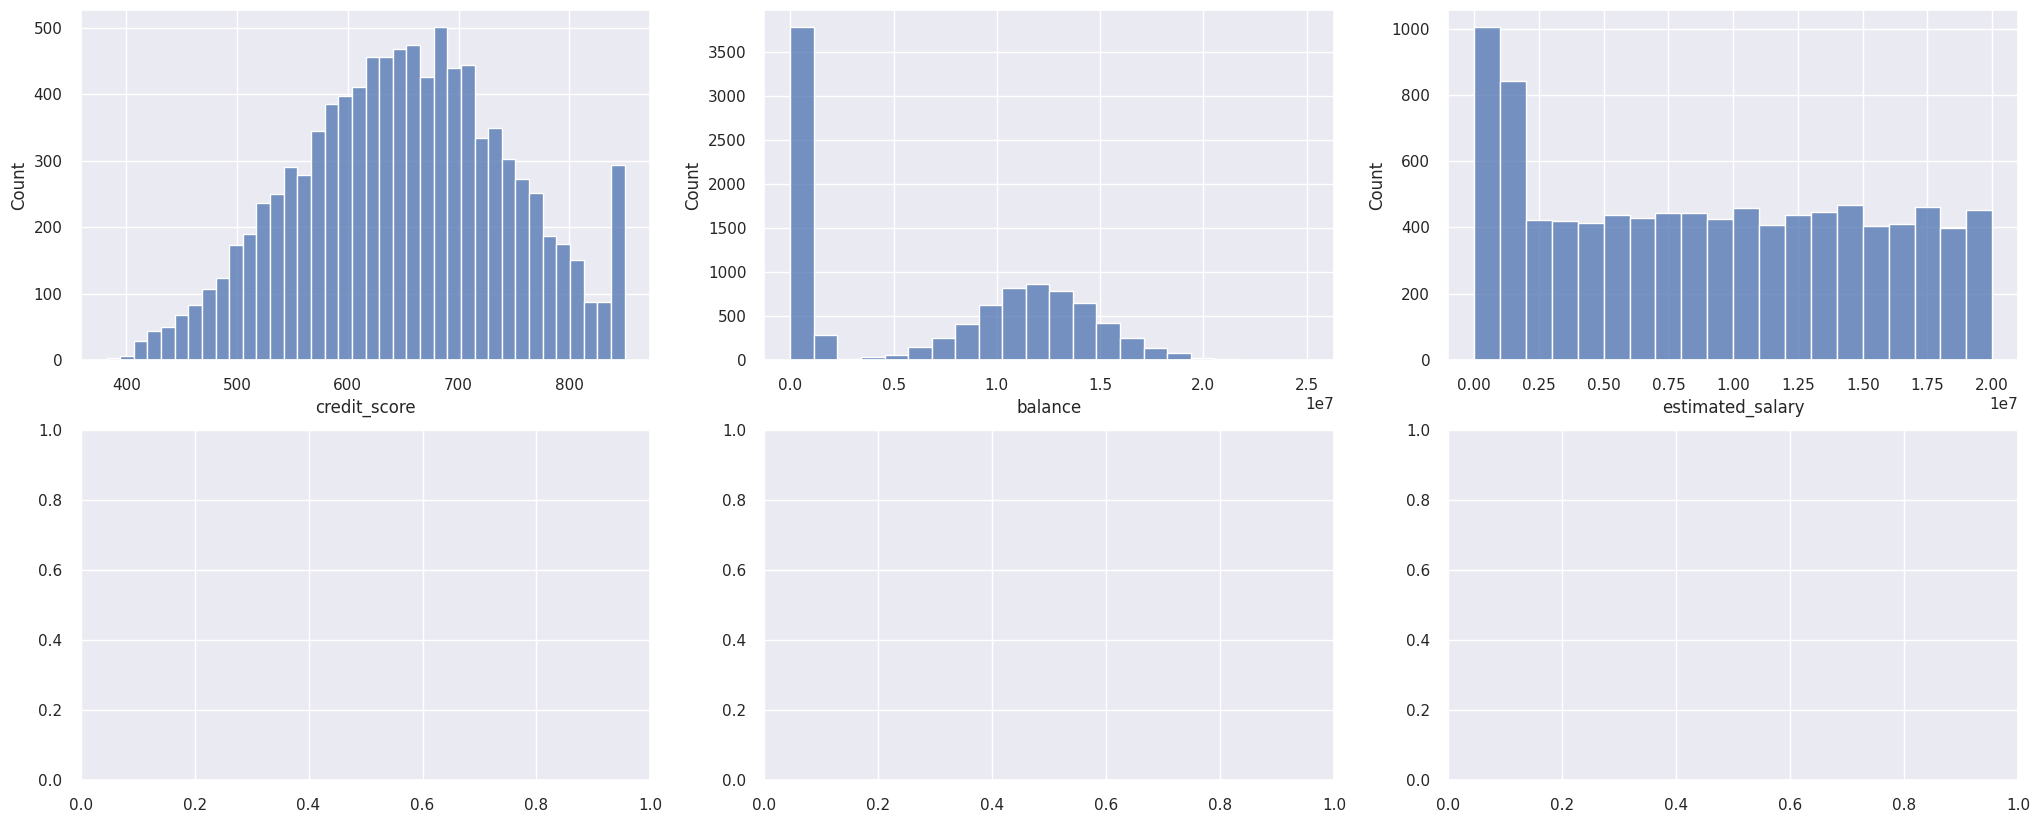

credit_score       balance  estimated_salary
count   9627.000000  9.627000e+03      9.627000e+03
mean     650.709982  6.991046e+06      9.094402e+06
std       96.124546  6.286194e+06      6.127766e+06
min      382.000000  0.000000e+00      5.230000e+02
25%      584.000000  0.000000e+00      3.331872e+06
50%      652.000000  8.692086e+06      8.899205e+06
75%      717.000000  1.246230e+07      1.439808e+07
max      850.000000  2.508981e+07      1.999925e+07

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize= (25,10))

for col, ax in zip(col_financial, axes.flat):
    sns.histplot(dataRaw[col], ax=ax)
plt.show()
dataRaw[col_financial].describe()

In [ ]:
balance_zero_count = dataRaw[dataRaw['balance'] == 0].shape[0]
print(f"Số lượng khách hàng có balance = 0: {balance_zero_count}")

Số lượng khách hàng có balance = 0: 3479


In [ ]:
# Kiểm tra tỷ lệ churn trong nhóm khách hàng có balance = 0
churn_balance_zero = dataRaw[dataRaw['balance'] == 0]['churn'].value_counts(normalize=True)
print(f"Tỷ lệ churn trong nhóm khách hàng có balance = 0:\n{churn_balance_zero}")


Tỷ lệ churn trong nhóm khách hàng có balance = 0:
churn
0    0.861742
1    0.138258
Name: proportion, dtype: float64


Tỷ lệ churn trong nhóm có balance = 0 thấp 13,82%

### Kiểm tra thông tin sử dụng dịch vụ

In [ ]:
dataRaw[col_product_usage].describe()

products_number  credit_card  active_member
count      9627.000000  9627.000000    9627.000000
mean          1.530903     0.704996       0.503584
std           0.580839     0.456068       0.500013
min           1.000000     0.000000       0.000000
25%           1.000000     0.000000       0.000000
50%           1.000000     1.000000       1.000000
75%           2.000000     1.000000       1.000000
max           4.000000     1.000000       1.000000

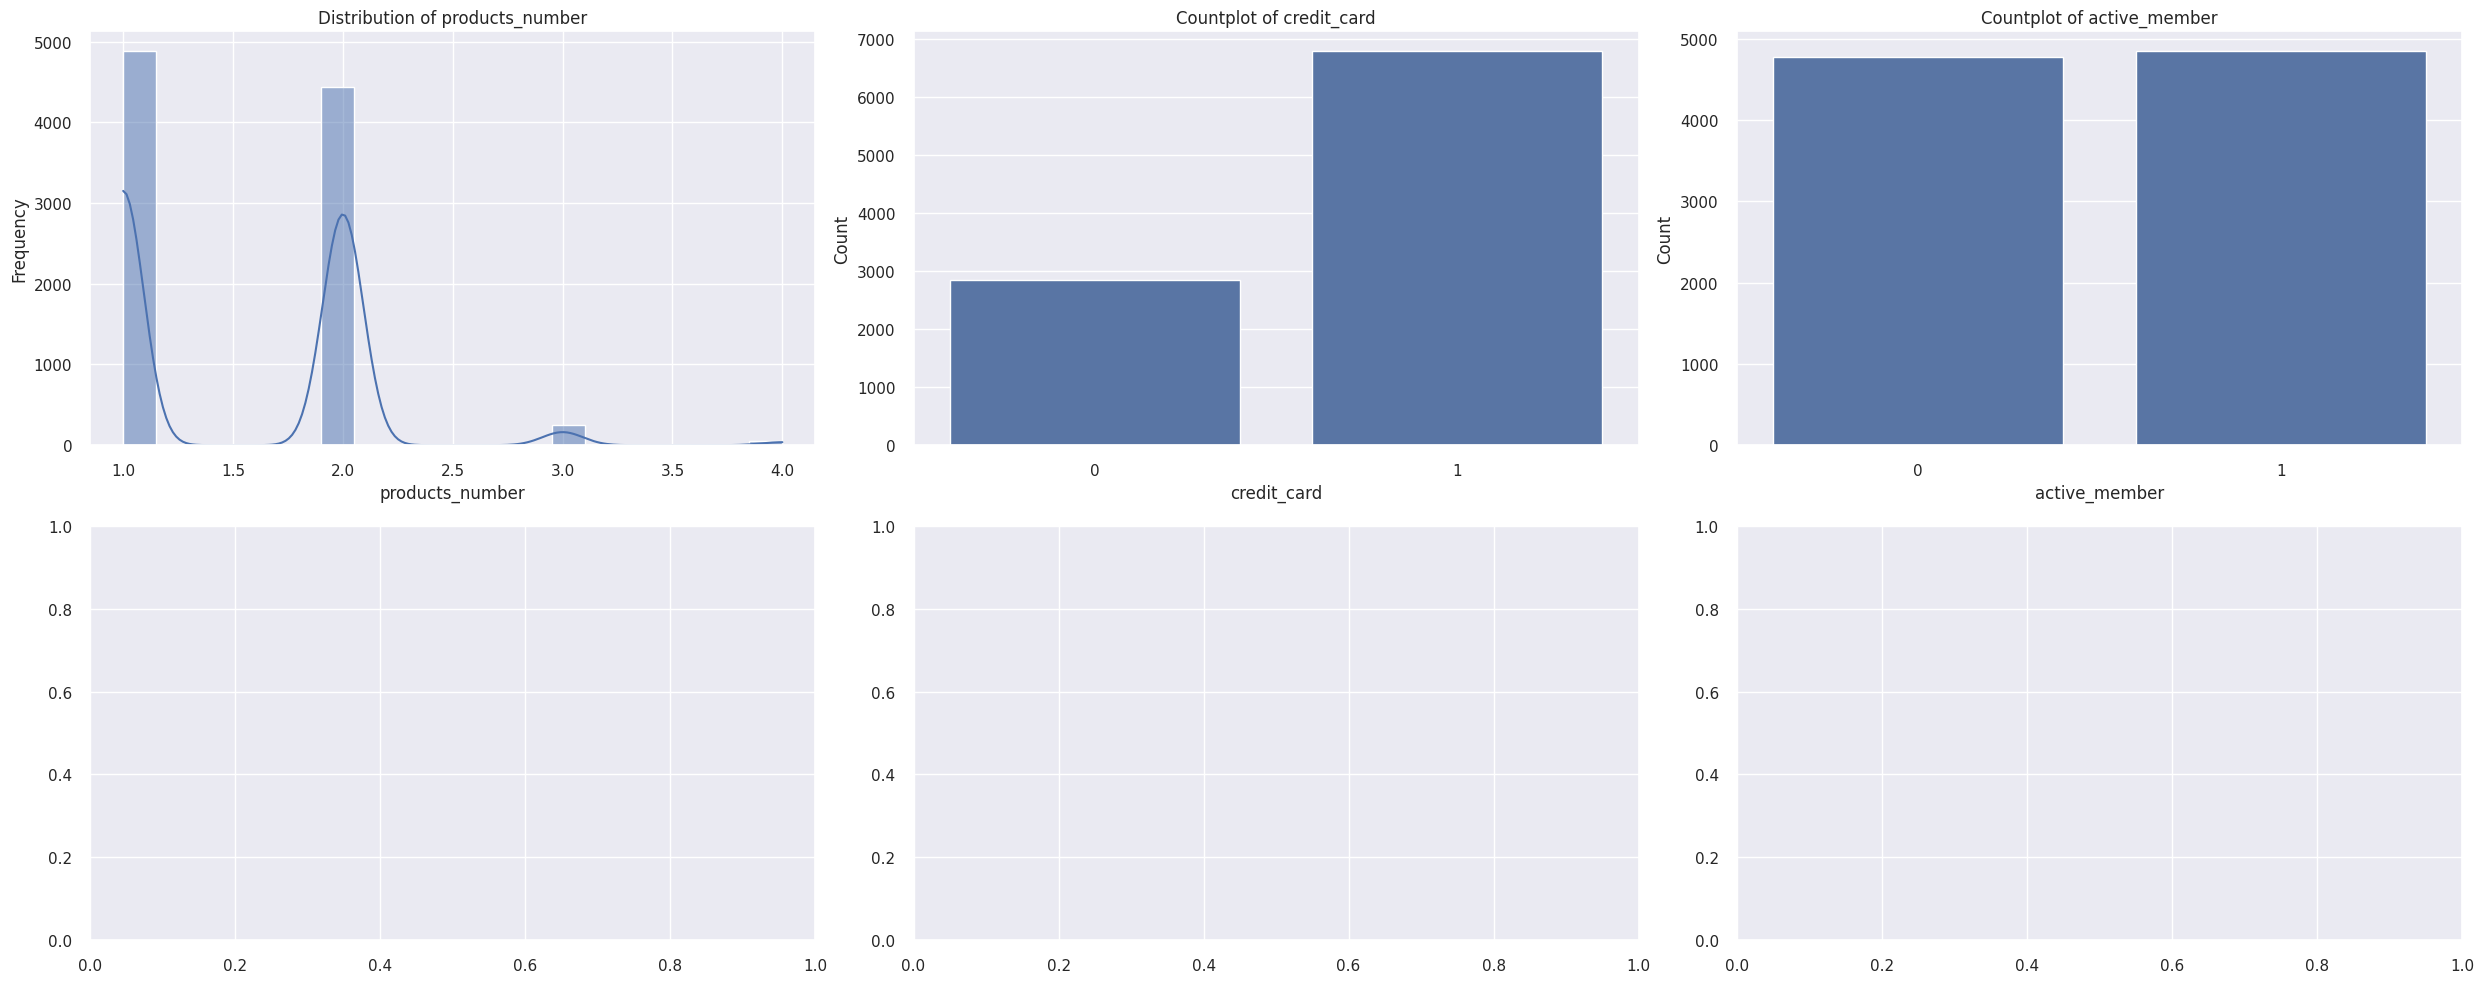

products_number  credit_card  active_member
count      9627.000000  9627.000000    9627.000000
mean          1.530903     0.704996       0.503584
std           0.580839     0.456068       0.500013
min           1.000000     0.000000       0.000000
25%           1.000000     0.000000       0.000000
50%           1.000000     1.000000       1.000000
75%           2.000000     1.000000       1.000000
max           4.000000     1.000000       1.000000

In [ ]:
# Tạo các biểu đồ phân phối cho các biến trong nhóm "Product Usage"
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(25, 10))

# Lặp qua từng cột trong nhóm col_product_usage và vẽ biểu đồ
for col, ax in zip(col_product_usage, axes.flat):
    if dataRaw[col].dtype == 'object' or len(dataRaw[col].unique()) <= 2:  # Biến phân loại hoặc nhị phân
        sns.countplot(x=dataRaw[col], ax=ax)
        ax.set_title(f'Countplot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
    else:  # Biến liên tục
        sns.histplot(dataRaw[col], ax=ax, kde=True, bins=20)  # Thêm đường cong kde và số lượng bins
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Kiểm tra thông tin mô tả của nhóm Product Usage
dataRaw[col_product_usage].describe()


In [ ]:
# Tính tỷ lệ sản phẩm trên mỗi năm sử dụng dịch vụ

dataRaw['products_number'].sum() / dataRaw['tenure'].sum()

0.30518512383003393

In [ ]:
# Tính tỷ lệ khách hàng sử dụng thẻ tín dụng
dataRaw['credit_card'].sum() / len(dataRaw)

0.7049963643918147

In [ ]:
# Tính tỷ lệ khách hàng là thành viên hoạt động
dataRaw['active_member'].sum() / len(dataRaw)

0.5035836709255219

### Kiểm tra hành vi khách hàng

In [ ]:
# Tính tỷ lệ churn
churn_rate = dataRaw['churn'].mean() * 100  # Churn = 1 là khách hàng rời bỏ
print(f"Tỷ lệ churn: {churn_rate:.2f}%")

Tỷ lệ churn: 20.26%


#### MQH giữa giữa các biến trong nhóm với churn

---





> MQH giữa thông tin khách hàng với churn


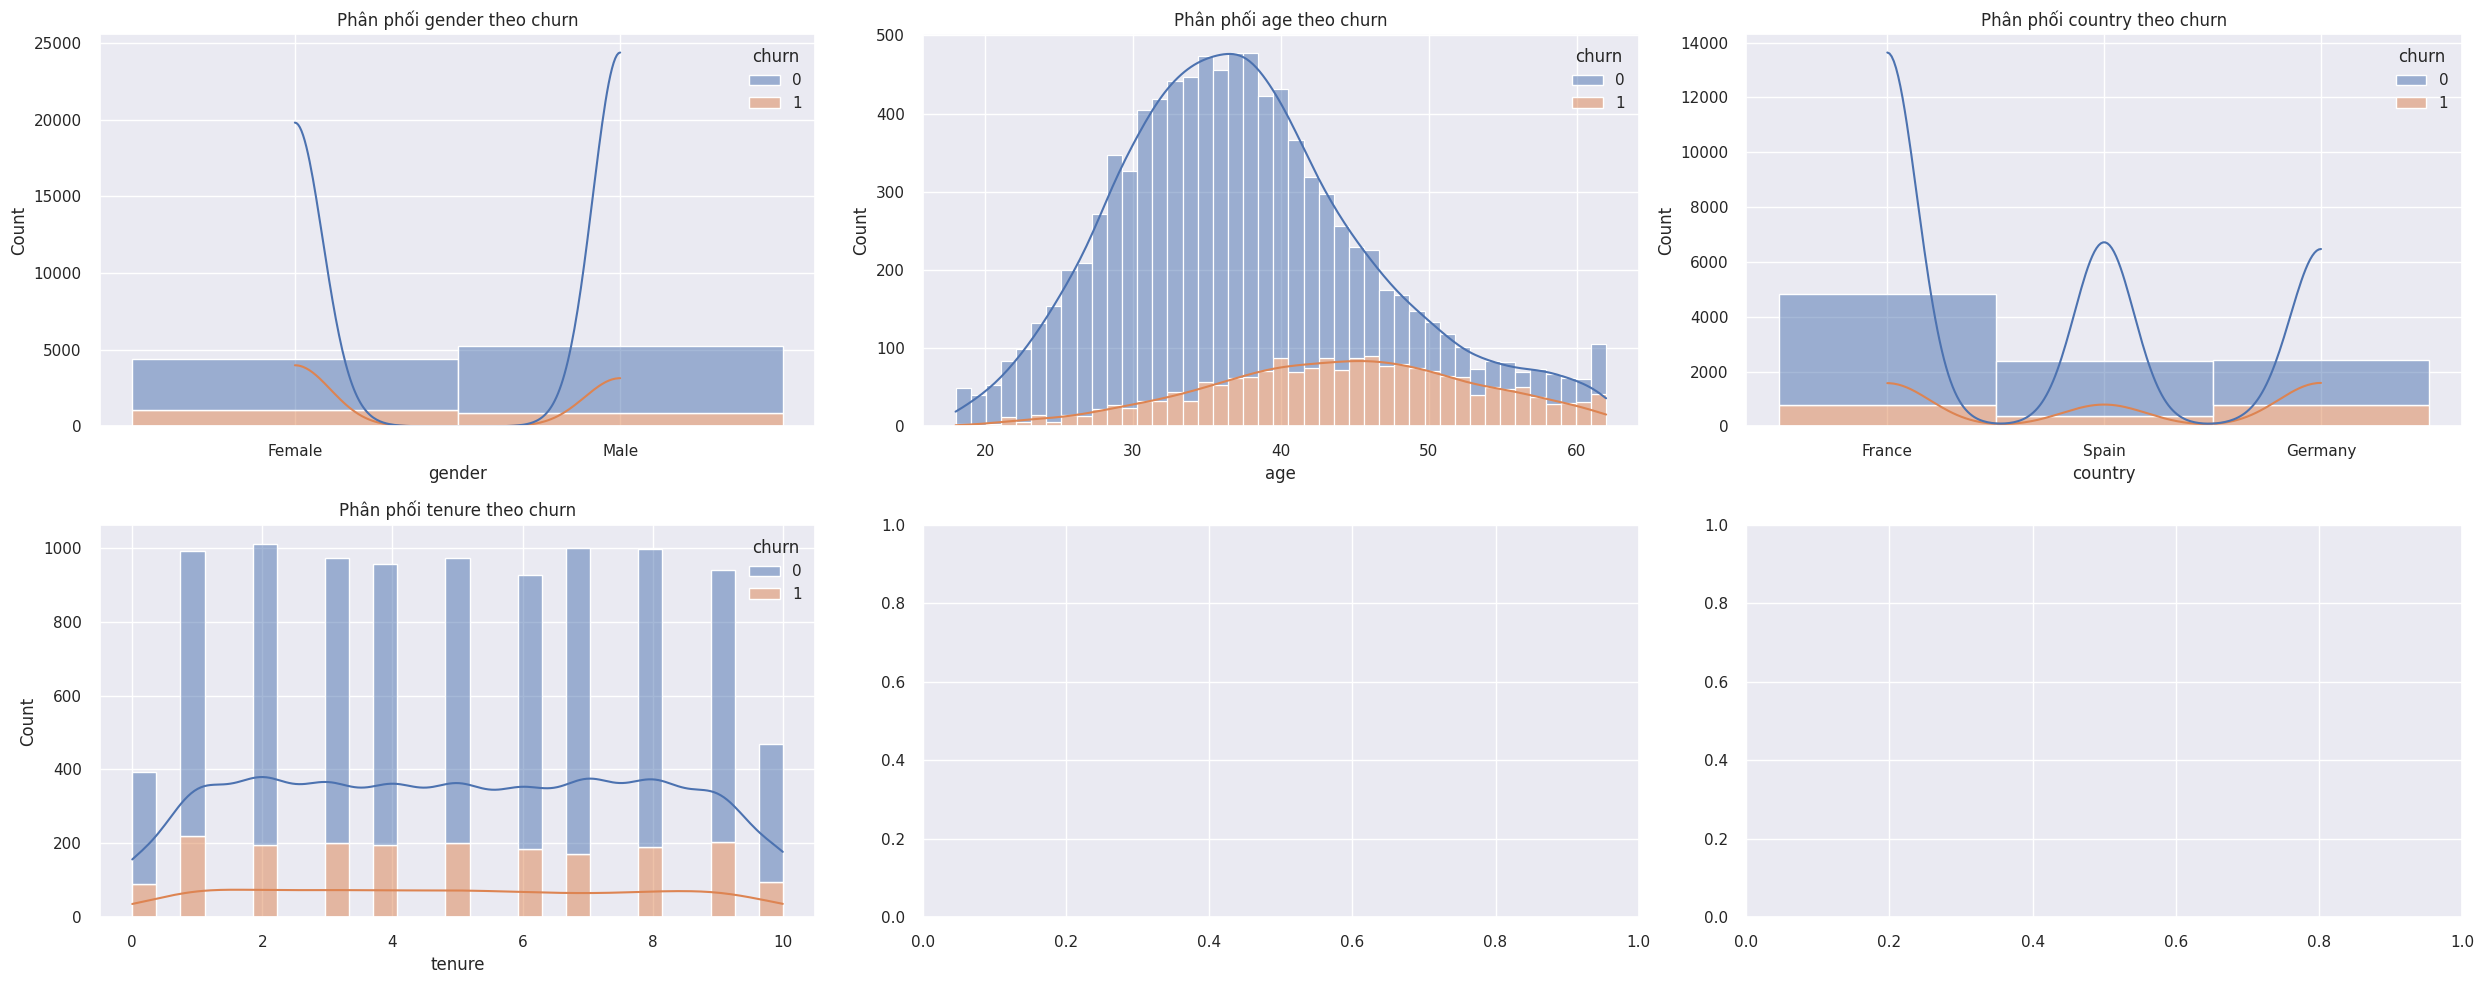

age       tenure
count  9627.000000  9627.000000
mean     37.782902     5.016308
std       8.798411     2.888474
min      18.000000     0.000000
25%      32.000000     3.000000
50%      37.000000     5.000000
75%      43.000000     7.000000
max      62.000000    10.000000

In [ ]:
# 1. Nhóm thông tin khách hàng
col_custInfo = ['gender', 'age', 'country', 'tenure']

# Tạo một plot với nhiều biểu đồ
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(25, 10))

# 2. Vẽ các biểu đồ để trực quan hóa mối quan hệ
for col, ax in zip(col_custInfo, axes.flat):
    sns.histplot(dataRaw, x=col, hue="churn", multiple="stack", kde=True, ax=ax)
    ax.set_title(f"Phân phối {col} theo churn")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# 3. Thống kê mô tả cho nhóm thông tin khách hàng
dataRaw[col_custInfo].describe()


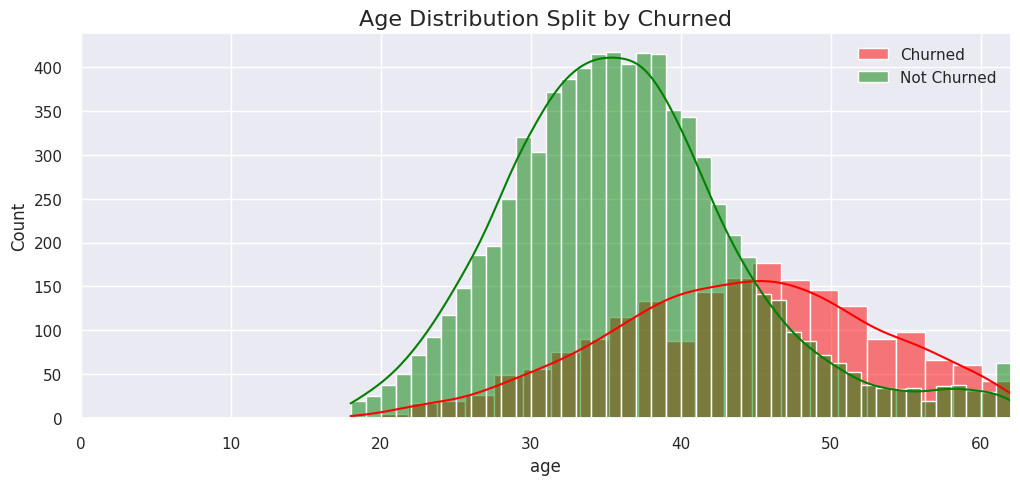

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Age Distribution Split by Churned', fontsize=16)

# Vẽ histogram cho những khách hàng đã churned (churn = 1)
sns.histplot(dataRaw[dataRaw['churn'] == 1]['age'], label='Churned', kde=True, color='red').set(xlim=(0, dataRaw['age'].max()))

# Vẽ histogram cho những khách hàng chưa churned (churn = 0)
sns.histplot(dataRaw[dataRaw['churn'] == 0]['age'], label='Not Churned', kde=True, color='green').set(xlim=(0, dataRaw['age'].max()))

# Hiển thị legend
plt.legend(loc='upper right')

# Hiển thị biểu đồ
plt.show()


Finding:

- Hầu hết những người trong độ tuổi từ 45 đến 57 có xu hướng churn.
- Khách hàng đến từ Germany có phần trăm churn cao hơn dù lượng khách hàng tương đôi với Spain

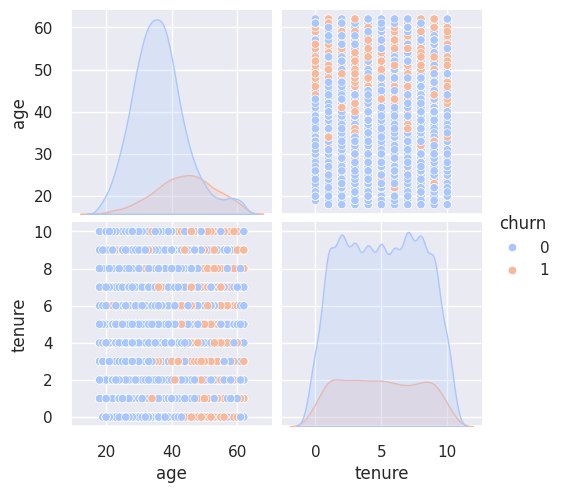

In [ ]:
# Tạo bản sao của danh sách cột thông tin khách hàng
colCustchurn = col_custInfo.copy()

# Thêm cột 'churn' vào để phân biệt giữa khách hàng churn và không churn
colCustchurn.extend(['churn'])

# Vẽ pairplot để kiểm tra mối quan hệ giữa các cột trong nhóm thông tin khách hàng và churn
sns.pairplot(dataRaw[colCustchurn], hue='churn', palette='coolwarm')

# Hiển thị biểu đồ
plt.show()


> MQH giữa thông tin tài chính với churn

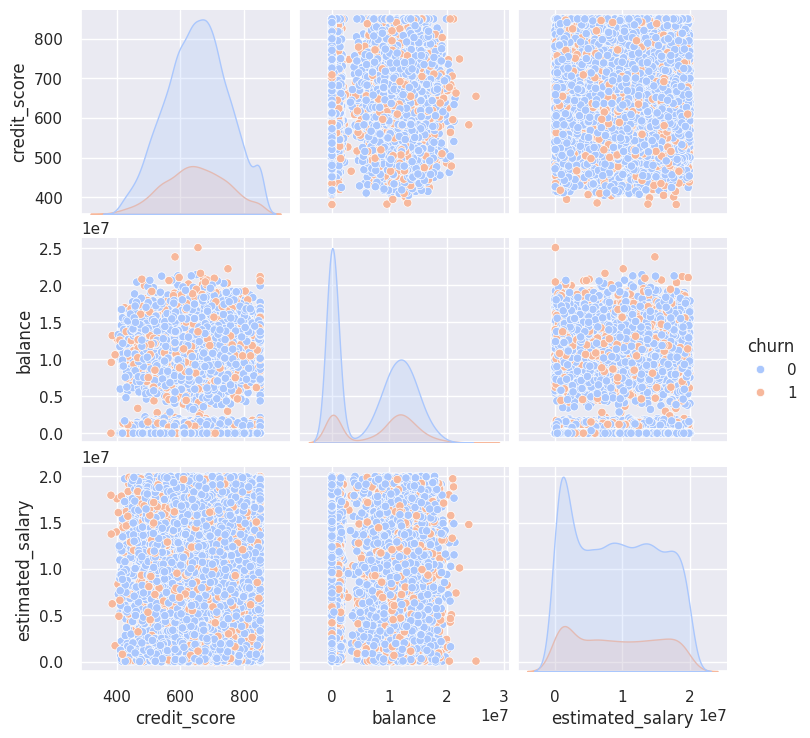

In [ ]:
colFinancialchurn = col_financial.copy()

# Thêm cột 'churn' vào để phân biệt giữa khách hàng churn và không churn
colFinancialchurn.extend(['churn'])

# Vẽ pairplot để kiểm tra mối quan hệ giữa các cột trong nhóm thông tin khách hàng và churn
sns.pairplot(dataRaw[colFinancialchurn], hue='churn', palette='coolwarm')

# Hiển thị biểu đồ
plt.show()

> MQH giữa các biến sử dụng dịch vụ và churn


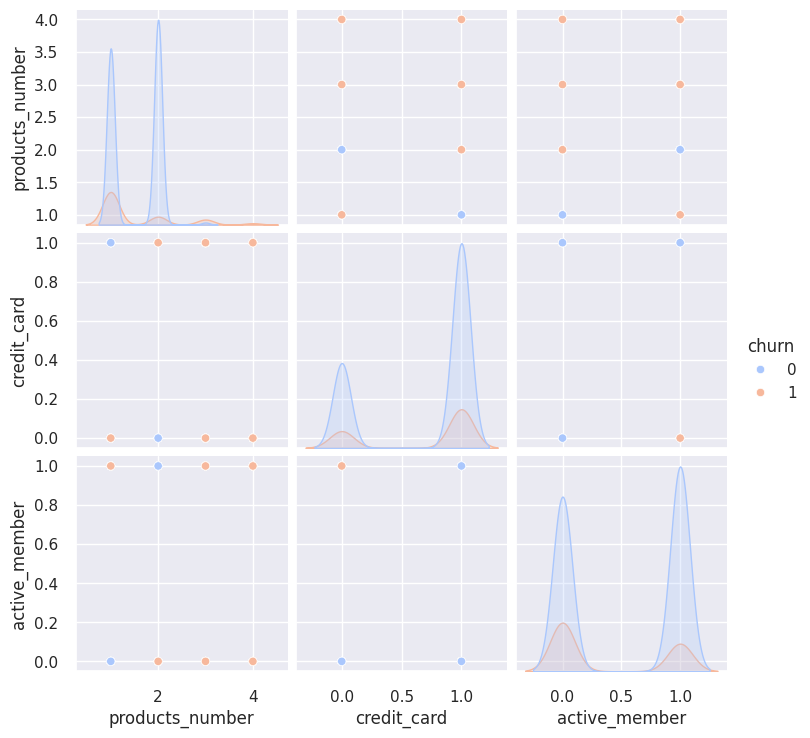

In [ ]:
colUsagechurn = col_product_usage.copy()

# Thêm cột 'churn' vào để phân biệt giữa khách hàng churn và không churn
colUsagechurn.extend(['churn'])

# Vẽ pairplot để kiểm tra mối quan hệ giữa các cột trong nhóm thông tin khách hàng và churn
sns.pairplot(dataRaw[colUsagechurn], hue='churn', palette='coolwarm')

# Hiển thị biểu đồ
plt.show()

> age,credit_score,products_number,credit_card,balance, vs churn¶


<Figure size 2000x1500 with 0 Axes>

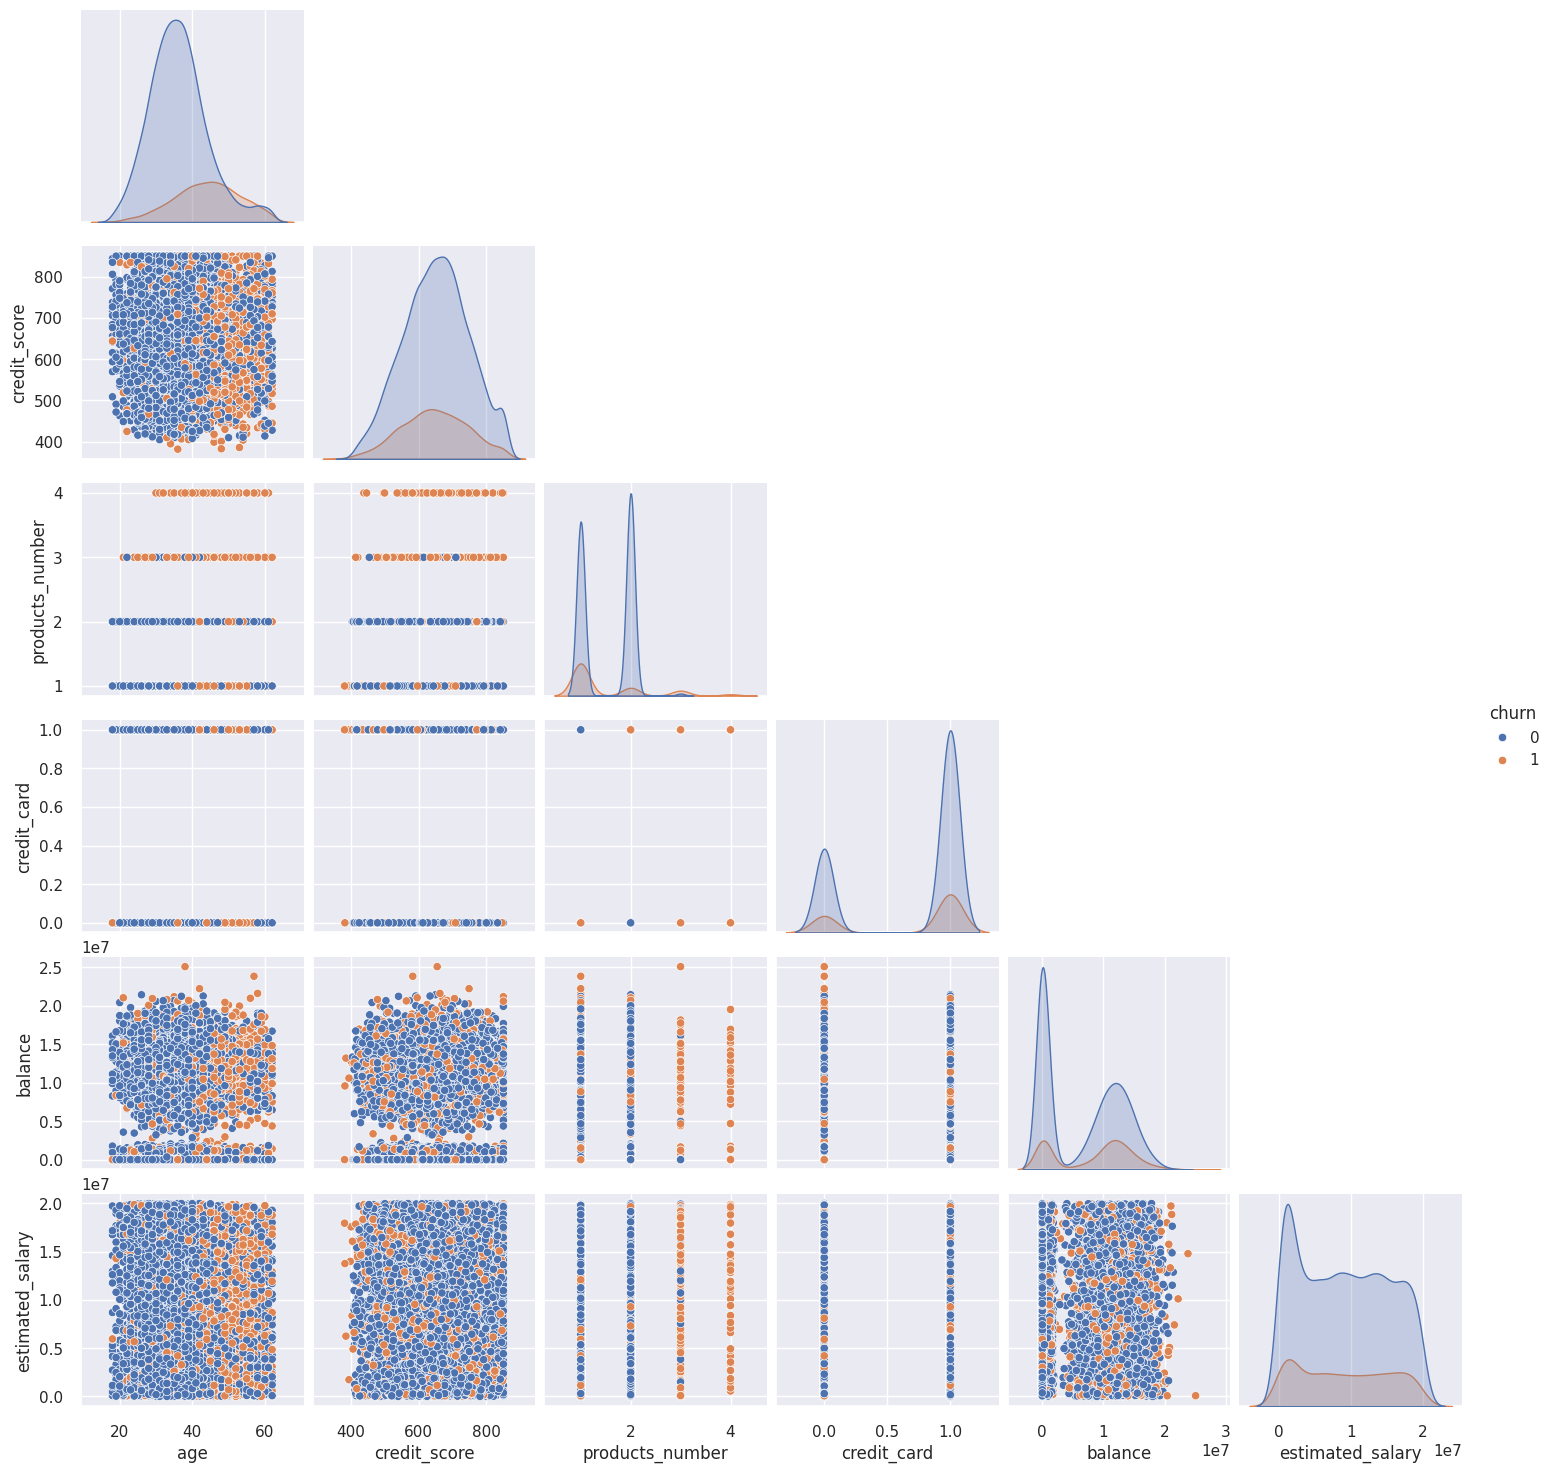

In [ ]:
plt.figure(figsize=(20, 15))
sns.pairplot(data=dataRaw[["age", "credit_score", "products_number", "credit_card", "balance", "estimated_salary", "churn"]],
             hue='churn', corner=True)  # corner=True để loại bỏ các biểu đồ đối xứng không cần thiết
plt.show()

#### MQH giữa các biến trong nhóm "Thông tin sử dụng dịch vụ" với "Thông tin khách hàng"

 Mối quan hệ giữa tenure (thời gian khách hàng gắn bó với ngân hàng) và age (tuổi của khách hàng).

>Kiểm tra xem liệu khách hàng lớn tuổi có xu hướng gắn bó lâu dài hơn hay không?



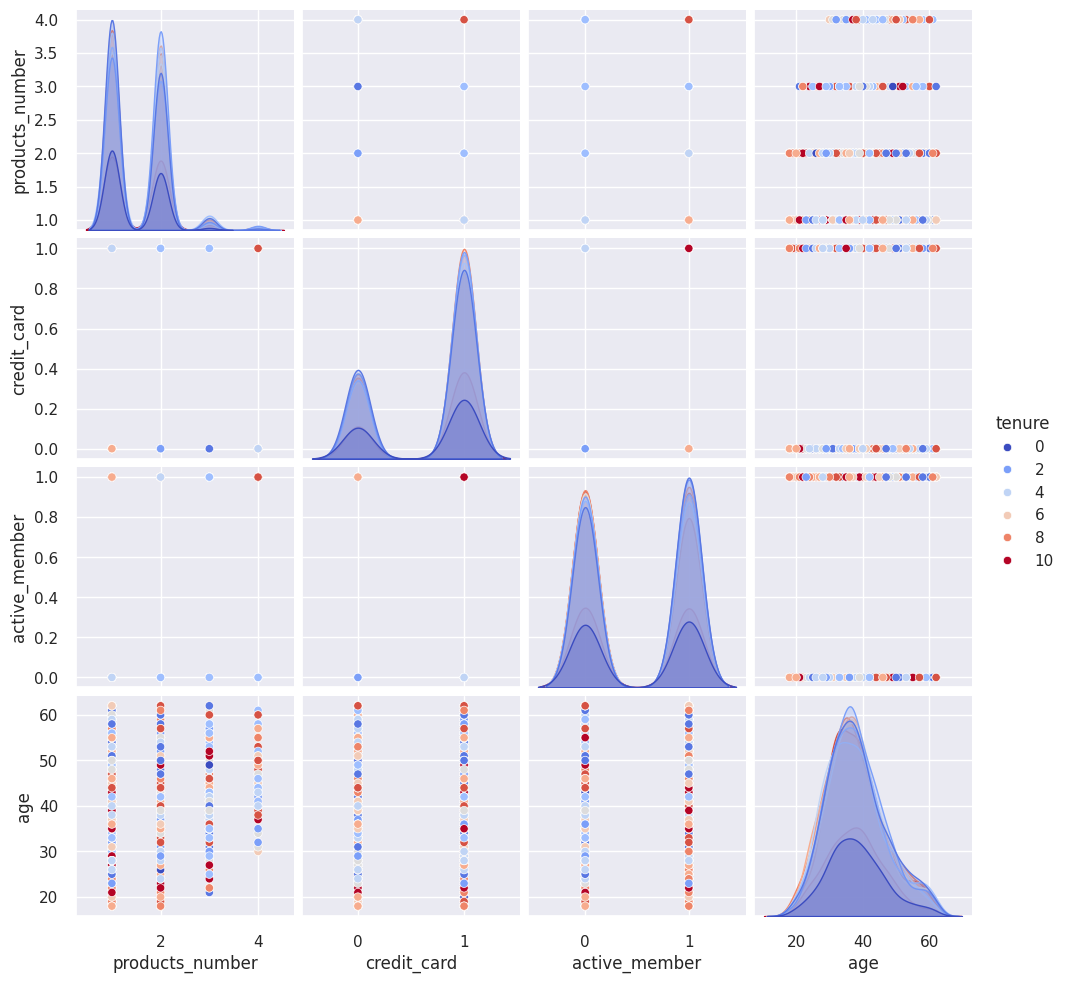

In [ ]:
colUsage_cust = col_product_usage.copy()
colUsage_cust.extend(['age', 'tenure'])

sns.pairplot(dataRaw[colUsage_cust], hue='tenure', palette='coolwarm')
plt.show()

> Kiểm tra xem liệu khách hàng ở các quốc gia khác nhau có xu hướng sử dụng các dịch vụ ngân hàng khác nhau không.

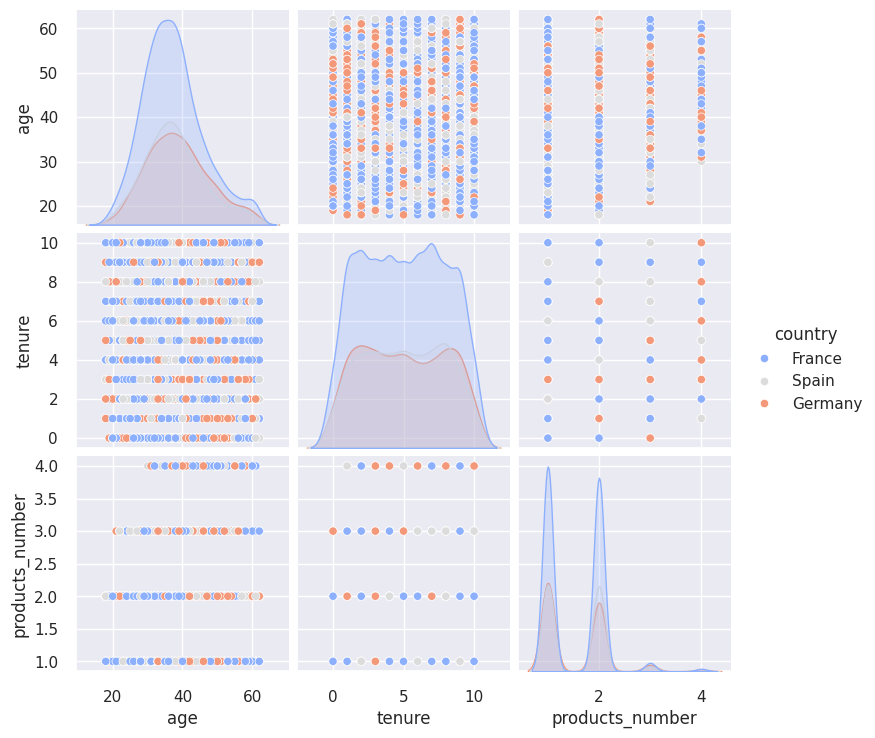

In [ ]:
colUsage_country = col_custInfo.copy()
colUsage_country.extend(['products_number'])

sns.pairplot(dataRaw[colUsage_country], hue='country', palette='coolwarm')
plt.show()

#### MQH giữa các yếu tố tài chính và hành vi sử dụng dịch vụ:


Kiểm tra mối quan hệ giữa các yếu tố tài chính với hành vi sử dụng dịch vụ.
> Liệu khách hàng có tài khoản với số dư cao có xu hướng đăng ký nhiều sản phẩm (products_number) hay có xu hướng sử dụng thẻ tín dụng (credit_card)?


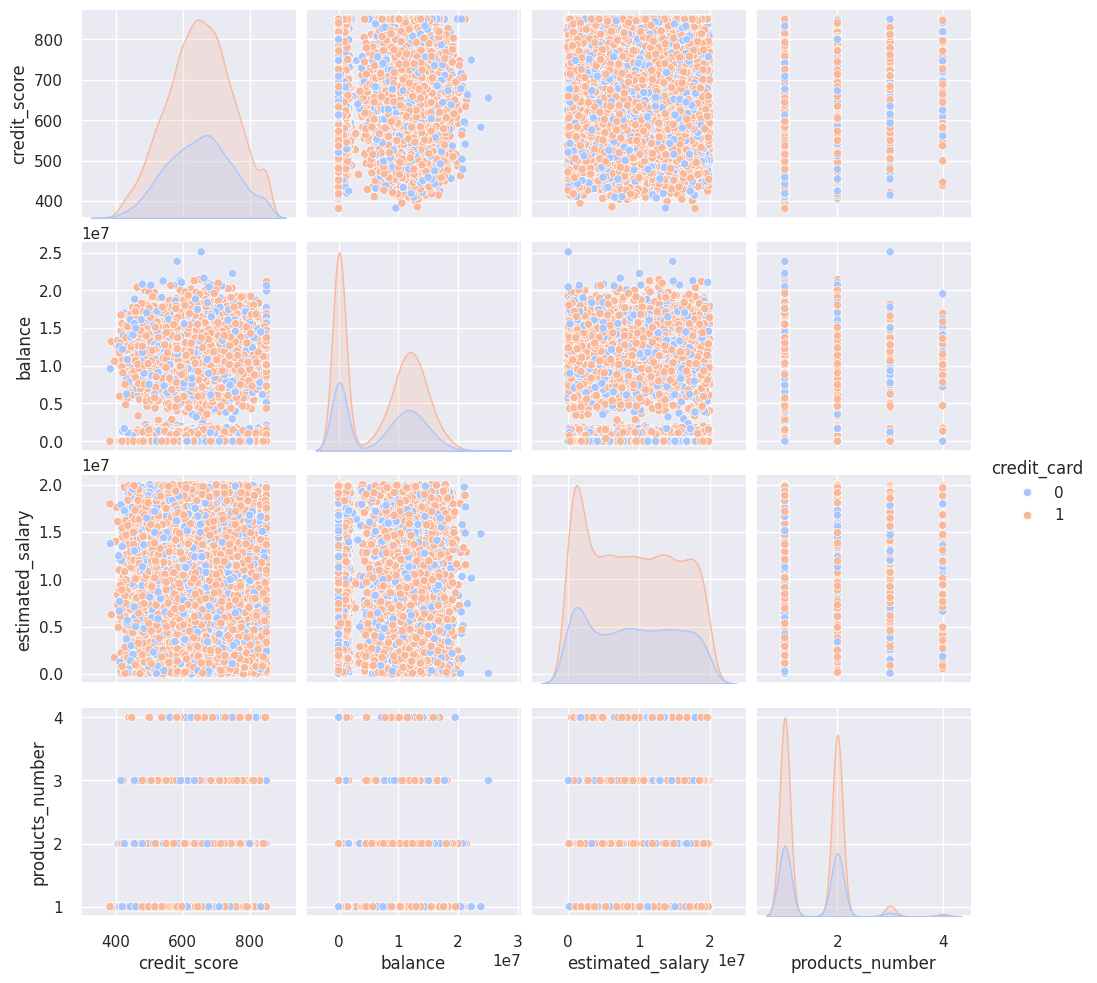

In [ ]:
colFinancial_behavior = col_financial.copy()
colFinancial_behavior.extend(['products_number', 'credit_card'])

sns.pairplot(dataRaw[colFinancial_behavior], hue='credit_card', palette='coolwarm')
plt.show()


#### Mối quan hệ giữa các yếu tố tài chính và thời gian khách hàng sử dụng dịch vụ:
> Kiểm tra xem liệu khách hàng có thời gian sử dụng dịch vụ dài (tenure lâu) có mức thu nhập (salary) hay điểm tín dụng (credit_score) cao hơn không

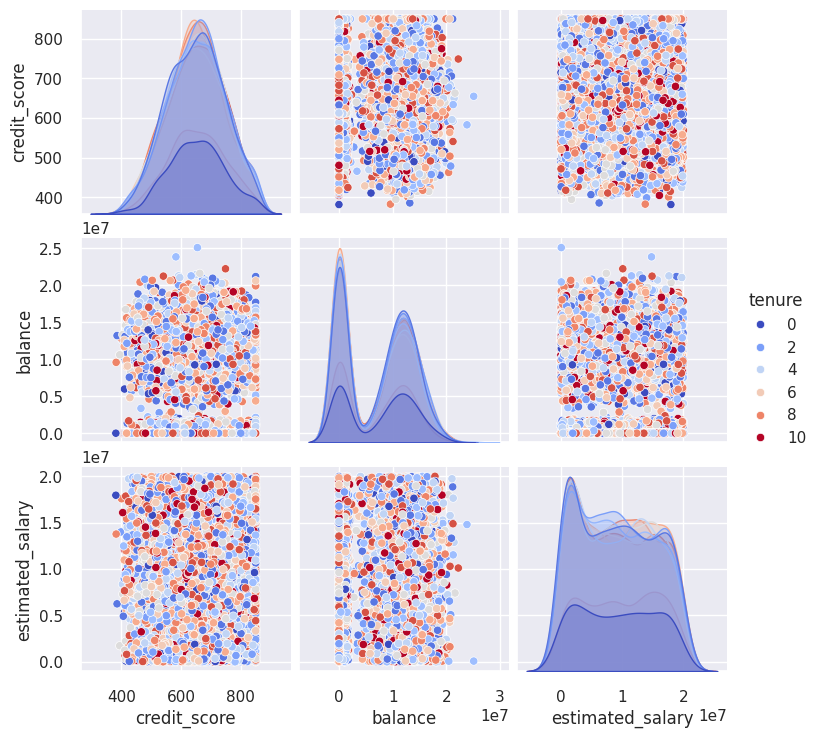

In [ ]:
colFinancial_tenure = col_financial.copy()
colFinancial_tenure.extend(['tenure'])

sns.pairplot(dataRaw[colFinancial_tenure], hue='tenure', palette='coolwarm')
plt.show()


#### MQH giữa các yếu tố tài chính và việc có trở thành thành viên hoạt động hay không (active_member):

> Xem xét mối quan hệ giữa credit_score (điểm tín dụng) và active_member (thành viên hoạt động) để xem liệu điểm tín dụng có ảnh hưởng đến việc khách hàng có duy trì hoạt động với ngân hàng hay không.

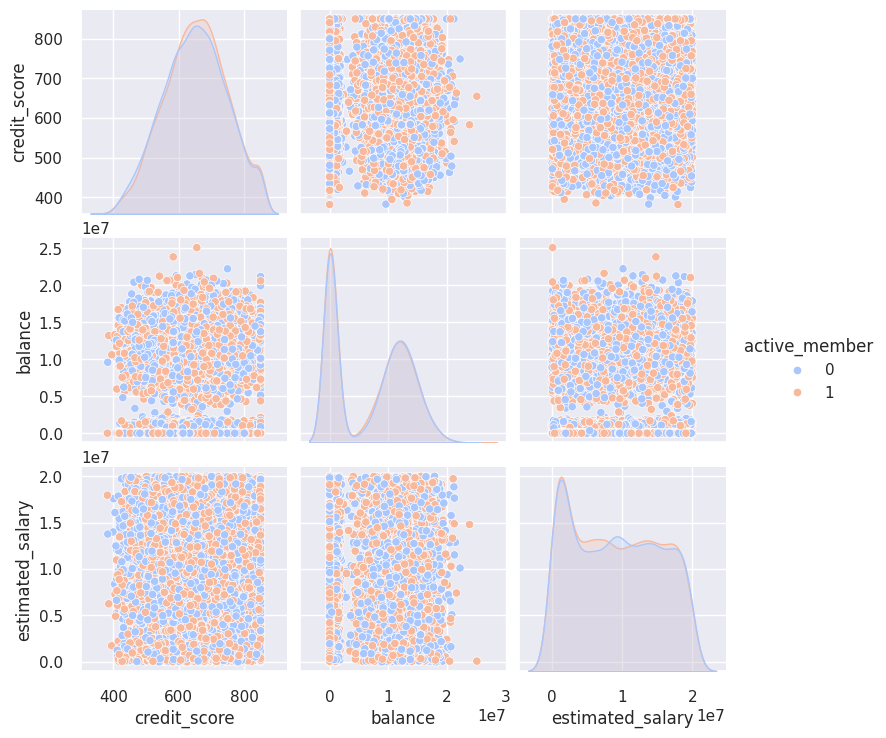

In [ ]:
colFinancial_member = col_financial.copy()
colFinancial_member.extend(['active_member'])

sns.pairplot(dataRaw[colFinancial_member], hue='active_member', palette='coolwarm')
plt.show()

#### **Note**


- Tất cả các hệ số tương quan giữa các yếu tố và kết quả rời bỏ ngân hàng đều nhỏ.
- Tuy nhiên, trong số các yếu tố này, năm yếu tố (giới tính, tuổi tác, số dư tài khoản, trạng thái thành viên hoạt động, quốc gia) cho thấy mối tương quan tương đối mạnh với kết quả rời bỏ ngân hàng.
Dựa vào phân bố dữ liệu ta thấy rằng:
1. Tuổi tác có ảnh hưởng đáng kể đến kết quả rời bỏ ngân hàng.
2. Những người có số dư trên 20 triệu và chưa có thẻ tín dụng sẽ có khả năng rời bỏ ngân hàng cao hơn.
3. Những người có điểm tín dụng thấp (dưới 400) sẽ có xu hướng rời bỏ ngân hàng bất kể số dư tài khoản của họ, dù họ có thẻ tín dụng hay không, và dù mức lương của họ cao hay thấp.
4. Xác suất rời bỏ ngân hàng tăng lên khi số lượng sản phẩm tăng, điều này có nghĩa là khách hàng sử dụng nhiều dịch vụ sẽ cảm thấy không thoải mái.
5. Việc rời bỏ ngân hàng không có mối liên hệ với thâm niên.
6. Một trường hợp đặc biệt là tại Đức, khách hàng chỉ sử dụng một dịch vụ cũng dễ rời bỏ ngân hàng (40%).

## ML support analysis

In [ ]:
# Các cột sử dụng chính
mainCol = list()
mainCol.extend(col_custInfo)
mainCol.extend(col_financial)
mainCol.extend(col_product_usage)

dataClean = dataRaw[mainCol]
dataClean.columns

Index(['gender', 'age', 'country', 'tenure', 'credit_score', 'balance',
       'estimated_salary', 'products_number', 'credit_card', 'active_member'],
      dtype='object')

### Encoding

In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9627 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            9627 non-null   object
 1   age               9627 non-null   int64 
 2   country           9627 non-null   object
 3   tenure            9627 non-null   int64 
 4   credit_score      9627 non-null   int64 
 5   balance           9627 non-null   int64 
 6   estimated_salary  9627 non-null   int64 
 7   products_number   9627 non-null   int64 
 8   credit_card       9627 non-null   int64 
 9   active_member     9627 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 827.3+ KB


In [ ]:
dataRaw['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
dataClean['country'] = dataClean['country'].replace({'France': 1, 'Spain': 2, 'Germany': 3})
dataClean['gender'] = dataClean['gender'].replace({'Female': 0, 'Male': 1})

In [ ]:
dataClean

gender  age  country  tenure  credit_score   balance  estimated_salary  \
0          0   42        1       2           619         0          10134888   
1          0   41        2       1           608   8380786          11254258   
2          0   42        1       8           502   1596608          11393157   
3          0   39        1       1           699         0           9382663   
4          0   43        2       2           850  12551082            790841   
...      ...  ...      ...     ...           ...       ...               ...   
9995       1   39        1       5           771         0           9627064   
9996       1   35        1      10           516   5736961          10169977   
9997       0   36        1       7           709         0           4208558   
9998       1   42        3       3           772   7507531           9288852   
9999       0   28        1       4           792  13014279           3819078   

      products_number  credit_card  active_member  
0                   1            1              1  
1                   1            0              1  
2                   3            1              0  
3                   2            0              0  
4                   1            1              1  
...               ...          ...            ...  
9995                2            1              0  
9996                1            1              1  
9997                1            0              1  
9998                2            1              0  
9999                1            1              0  

[9627 rows x 10 columns]

### Scaling

In [ ]:
scaler = StandardScaler()

dataScaled = scaler.fit_transform(dataClean)
dataScaled = pd.DataFrame(dataScaled, columns=dataClean.columns, index = dataClean.index)
dataScaled

gender       age   country    tenure  credit_score   balance  \
0    -1.097262  0.479327 -0.902871 -1.044311     -0.329901 -1.112185   
1    -1.097262  0.365664  0.300665 -1.390532     -0.444342  0.221090   
2    -1.097262  0.479327 -0.902871  1.033018     -1.547136 -0.858185   
3    -1.097262  0.138339 -0.902871 -1.390532      0.502395 -1.112185   
4    -1.097262  0.592990  0.300665 -1.044311      2.073356  0.884530   
...        ...       ...       ...       ...           ...       ...   
9995  0.911360  0.138339 -0.902871 -0.005646      1.251463 -1.112185   
9996  0.911360 -0.316312 -0.902871  1.725461     -1.401484 -0.199509   
9997 -1.097262 -0.202650 -0.902871  0.686797      0.606432 -1.112185   
9998  0.911360  0.479327  1.504202 -0.698089      1.261866  0.082166   
9999 -1.097262 -1.111952 -0.902871 -0.351868      1.469940  0.958218   

      estimated_salary  products_number  credit_card  active_member  
0             0.169807        -0.914075     0.646875       0.992858  
1             0.352489        -0.914075    -1.545894       0.992858  
2             0.375157         2.529401     0.646875      -1.007193  
3             0.047044         0.807663    -1.545894      -1.007193  
4            -1.355142        -0.914075     0.646875       0.992858  
...                ...              ...          ...            ...  
9995          0.086930         0.807663     0.646875      -1.007193  
9996          0.175534        -0.914075     0.646875       0.992858  
9997         -0.797370        -0.914075    -1.545894       0.992858  
9998          0.031734         0.807663     0.646875      -1.007193  
9999         -0.860933        -0.914075     0.646875      -1.007193  

[9627 rows x 10 columns]

### Clustering

In [ ]:
# Reduce dimension
pca = PCA(n_components=3, random_state=0)

# Việc lựa chọn số lượng components sẽ được điều chỉnh sau khi evaluate lại dữ liệu theo từng cụm
dataPCA = pca.fit_transform(dataScaled)
dataPCA = pd.DataFrame(dataPCA)
dataPCA

0         1         2
0    -0.727082  0.977522  0.641037
1     0.874371  1.947599  0.722745
2    -2.198463 -0.020358 -2.377840
3    -1.458173  1.604955 -0.369959
4     1.332615  1.394893  0.758721
...        ...       ...       ...
9622 -1.581808 -0.616513 -0.142204
9623 -0.384465 -1.678012  0.817212
9624 -0.861910  0.922110  0.736472
9625  0.605517  0.054306 -0.662215
9626  0.465151 -0.741362 -0.001976

[9627 rows x 3 columns]

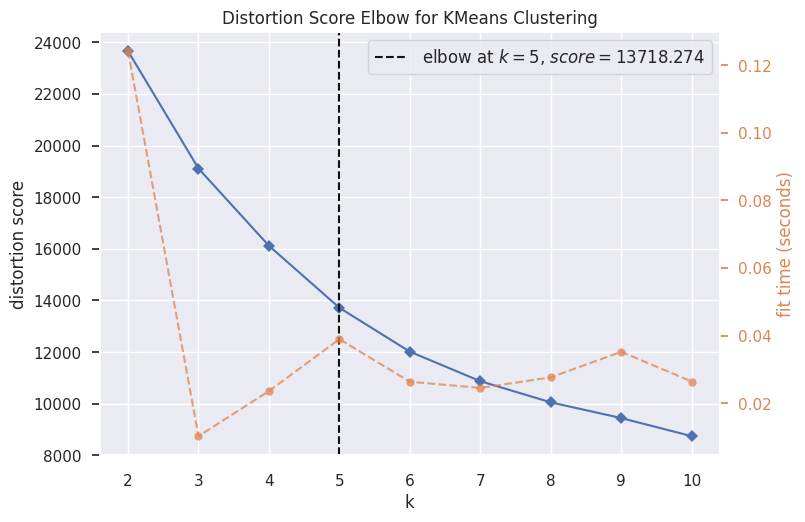

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(dataPCA)
Elbow_M.show();

In [ ]:
kmean = KMeans(n_clusters = 5, random_state=0)
cluster = kmean.fit_predict(dataPCA)

dataPCA['Cluster'] = cluster
dataClean['Cluster'] = cluster

In [ ]:
fig = px.scatter_3d(dataPCA, x=0, y=1, z=2, color='Cluster', title="Customer Segmentation")
fig.update_traces(marker_coloraxis=None)
fig.show()


### Cluster evaluation

In [ ]:
# Hàm trực quan dữ liệu
def scatterCheck(dataTable: pd.DataFrame, xName:str, yName:str, hue="Cluster"):
    fig = sns.scatterplot(data = dataClean,
                        x = dataClean[xName],
                        y = dataClean[yName],
                        hue = dataClean[hue],
                        palette= 'copper_r')

    fig.set_title(f"Phân bố các cụm dựa vào thông tin {xName} và {yName}")
    plt.legend()
    plt.show()
    return

def boxenplotCheck(dataTable: pd.DataFrame, factorCheck: str, clusterColumn="Cluster"):
    plt.figure()
    fig = sns.boxenplot(x = dataTable[clusterColumn],
                        y = dataTable[factorCheck],
                        palette ='copper_r')
    fig.set_title(f"So sánh yếu tố {factorCheck} giữa các cụm")
    plt.show()
    return

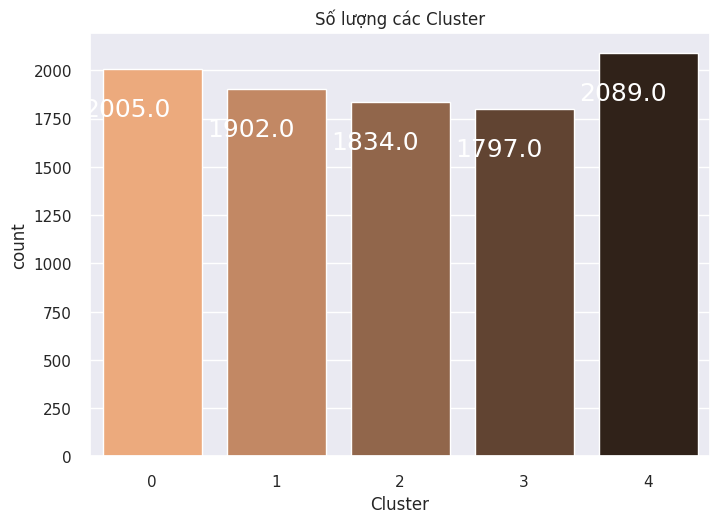

In [ ]:
fig = sns.countplot(x = dataClean["Cluster"], palette= 'copper_r')
for p in fig.patches:
    fig.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
fig.set_title("Số lượng các Cluster")
plt.show()

In [ ]:
cluster_distribution = dataClean['Cluster'].value_counts(normalize=True) * 100
print(cluster_distribution)

Cluster
4    21.699387
0    20.826841
1    19.756934
2    19.050587
3    18.666251
Name: proportion, dtype: float64


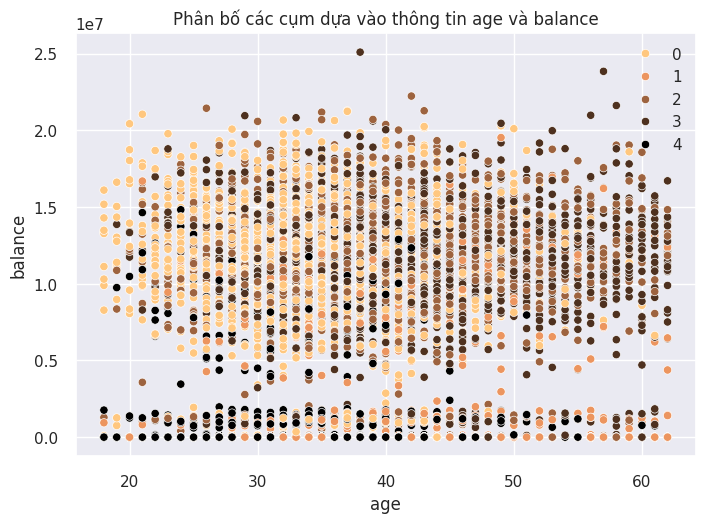

In [ ]:
scatterCheck(dataClean, "age", "balance", hue="Cluster")


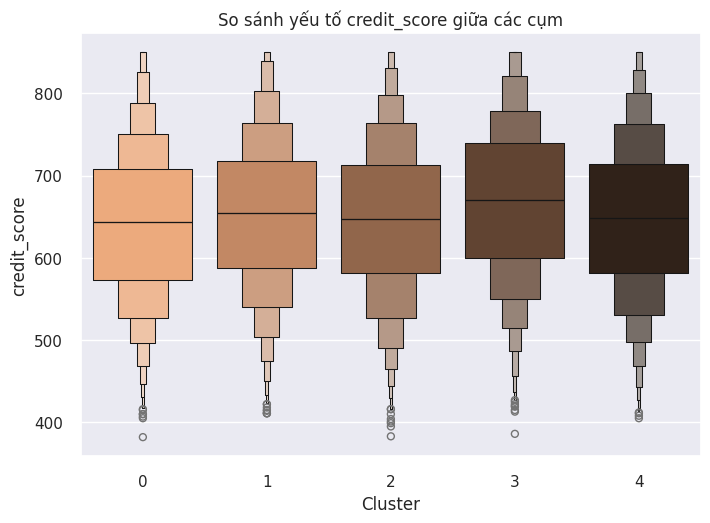

In [ ]:
boxenplotCheck(dataClean, "credit_score", clusterColumn="Cluster")

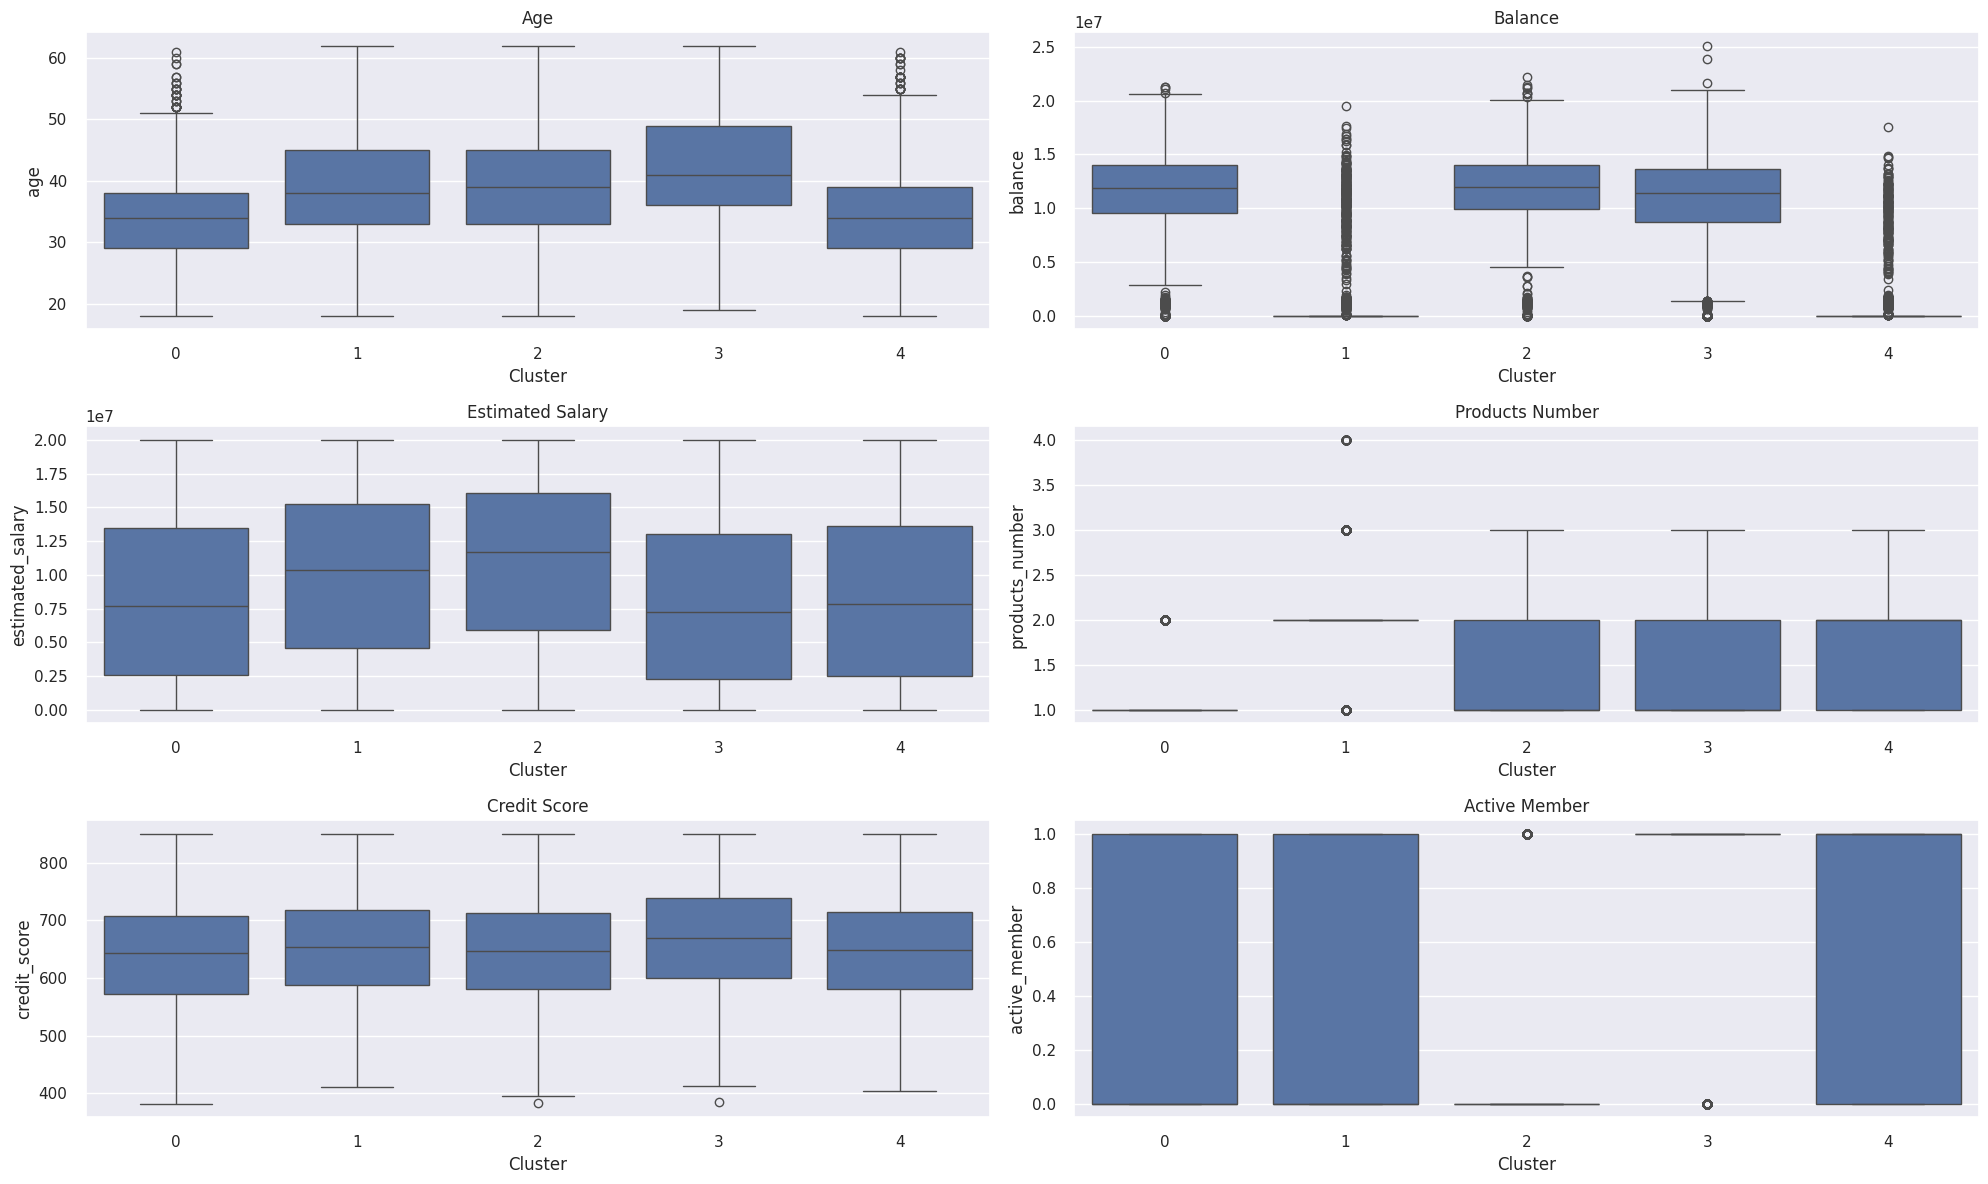

In [ ]:
def boxPlotCheck(data, onCluster):
    figure, axes = plt.subplots(3, 2, figsize=(20, 12))  # Chỉnh sửa thành 3 hàng và 2 cột

    axes = axes.flatten()

    # Sự phân bố "Age" giữa các cụm
    axes[0].set_title("Age")
    sns.boxplot(x=onCluster, y="age", data=data, ax=axes[0])

    # Sự phân bố "Balance" giữa các cụm
    axes[1].set_title("Balance")
    sns.boxplot(x=onCluster, y="balance", data=data, ax=axes[1])

    # Sự phân bố "Estimated Salary" giữa các cụm
    axes[2].set_title("Estimated Salary")
    sns.boxplot(x=onCluster, y="estimated_salary", data=data, ax=axes[2])

    # Sự phân bố "Products Number" giữa các cụm
    axes[3].set_title("Products Number")
    sns.boxplot(x=onCluster, y="products_number", data=data, ax=axes[3])

    # Sự phân bố "Credit Score" giữa các cụm
    axes[4].set_title("Credit Score")
    sns.boxplot(x=onCluster, y="credit_score", data=data, ax=axes[4])

    # Sự phân bố "Active Mêmber" giữa các cụm
    axes[5].set_title("Active Member")
    sns.boxplot(x=onCluster, y="active_member", data=data, ax=axes[5])

    plt.tight_layout()
    plt.show()
    return

# Áp dụng hàm trên dữ liệu của bạn với cụm (cluster)
boxPlotCheck(dataClean, "Cluster")


- Age: Phân bố độ tuổi của khách hàng trong từng cụm.
- Balance: Phân bố số dư tài khoản của khách hàng trong từng cụm.
- Estimated Salary: Phân bố mức lương ước tính của khách hàng trong từng cụm.
- Products Number: Phân bố số lượng sản phẩm mà khách hàng sử dụng từ ngân hàng trong từng cụm.
- Credit Score: Bạn sẽ kiểm tra sự phân bố của điểm tín dụng (credit_score) giữa các cụm

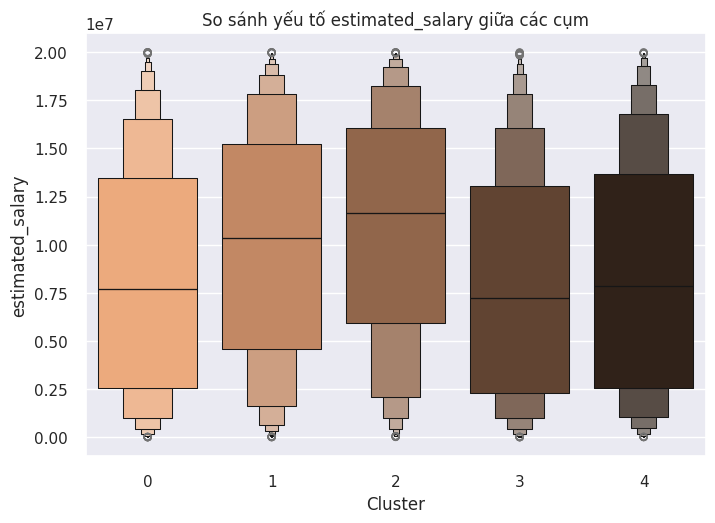

In [ ]:
boxenplotCheck(dataClean, "estimated_salary")

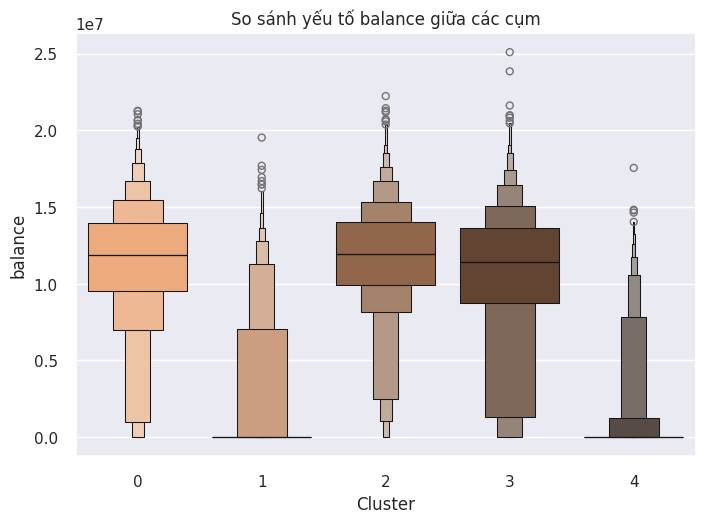

In [ ]:
boxenplotCheck(dataClean, "balance")

In [ ]:
# Tính các giá trị thống kê cho estimated_salary và balance theo từng Cluster
summary = dataClean.groupby('Cluster')[['estimated_salary', 'balance']].agg(
    ['mean', 'median', 'std', 'min', 'max']).reset_index()

print(summary)


  Cluster estimated_salary                                            \
                      mean      median           std   min       max   
0       0     8.283644e+06   7711945.0  6.014685e+06   824  19995333   
1       1     1.001124e+07  10337605.0  6.070504e+06  3560  19999248   
2       2     1.090050e+07  11664264.0  6.016951e+06  9175  19997074   
3       3     7.977155e+06   7217213.0  5.921564e+06   523  19986275   
4       4     8.413236e+06   7849804.0  6.090422e+06  8065  19990932   

        balance                                          
           mean      median           std min       max  
0  1.119675e+07  11857724.0  4.390693e+06   0  21269297  
1  1.589535e+06         0.0  3.819913e+06   0  19523829  
2  1.153744e+07  11966433.5  3.911493e+06   0  22226763  
3  1.042974e+07  11432759.0  4.896394e+06   0  25089809  
4  9.229821e+05         0.0  2.757192e+06   0  17546485  


In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9627 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            9627 non-null   int64
 1   age               9627 non-null   int64
 2   country           9627 non-null   int64
 3   tenure            9627 non-null   int64
 4   credit_score      9627 non-null   int64
 5   balance           9627 non-null   int64
 6   estimated_salary  9627 non-null   int64
 7   products_number   9627 non-null   int64
 8   credit_card       9627 non-null   int64
 9   active_member     9627 non-null   int64
 10  Cluster           9627 non-null   int32
dtypes: int32(1), int64(10)
memory usage: 864.9 KB


**Note**

Các cluster này thể hiện rõ hành vi chi tiêu của khách hàng:

1. Cluster 4 chiếm 21.69% lượng khách hàng có các đặc điểm balance phần lớn = 0, estimated_salary phần lớn phân bổ trong khoảng 0.25-1.25M, độ tuổi từ 30-40 tuổi, 100% có active member
> Nhận định hành vi:
  - Chi tiêu thận trọng: Vì balance gần như bằng 0, khách hàng trong cụm này có thể chưa có nhiều tiền trong tài khoản hoặc chỉ chi tiêu rất ít.
  - Thu nhập trung bình: Thu nhập của họ không cao (0.25M đến 1.25M), có thể khiến họ chỉ chi tiêu cho những thứ cần thiết hoặc có kế hoạch chi tiêu hợp lý.
  - Khách hàng trung thành: Việc 100% khách hàng trong cụm này là active member cho thấy họ có sự gắn bó mạnh mẽ với sản phẩm/dịch vụ, dù balance thấp, có thể họ tham gia dịch vụ để tận dụng các tiện ích mà dịch vụ cung cấp.
2. Cluster 0 balance ở mức từ 1.0- 1.5M, estimated_salary phần lớn phân bổ trong khoảng 0.25-1.25M
> Nhận định hành vi:
  - Chi tiêu trung bình: Với số dư tài khoản ở mức trung bình và thu nhập không cao (0.25M đến 1.25M), khách hàng trong cụm này có thể là nhóm chi tiêu ổn định nhưng không phải là nhóm chi tiêu quá nhiều.
  - Khách hàng có tiềm năng: Mặc dù thu nhập của họ chưa đạt mức cao, nhưng với balance ổn định, họ có khả năng chi tiêu nhiều hơn nếu có những chiến lược phù hợp (khuyến mãi, dịch vụ hấp dẫn).
3. Cluster 1 balance ở mức < 1.0 , estimated_salary phần lớn phân bổ trong khoảng 0.25-1.25M
> Nhận định hành vi:
  - Chi tiêu hạn chế: Với số dư tài khoản dưới 1.0M và thu nhập trung bình, khách hàng trong cụm này có thể là nhóm chi tiêu ít hoặc không ổn định. Họ có thể là những người không tiêu xài quá nhiều hoặc không có thói quen sử dụng dịch vụ thường xuyên.
  - Cần sự hỗ trợ và khuyến khích: Đây là nhóm khách hàng có thể cần sự khuyến khích từ dịch vụ để tham gia nhiều hơn hoặc có các chiến lược tiếp cận để giữ chân họ.
4. Cluster 2 balance ở mức từ 1.0- 1.5M, estimated_salary phần lớn phân bổ trong khoảng 0.75-1.55M
> Nhận định hành vi:
  - Chi tiêu khá cao: Với số dư tài khoản và thu nhập khá ổn định và cao hơn mức trung bình, khách hàng trong cụm này có thể chi tiêu nhiều hơn và thường xuyên tham gia các dịch vụ.
  - Khách hàng có tiềm năng lớn: Đây là nhóm khách hàng có tiềm năng chi tiêu lớn hơn và có thể trở thành khách hàng trung thành hoặc trở thành người giới thiệu cho sản phẩm/dịch vụ nếu có chương trình khuyến mãi hấp dẫn.
5. Cluster 3 balance ở mức từ 1.0- 1.5M, estimated_salary phần lớn phân bổ trong khoảng 0.25-1.25M
> Nhận định hành vi:
  - Chi tiêu ổn định: Với balance ở mức trung bình và thu nhập trong khoảng trung bình (0.25M đến 1.25M), khách hàng trong cụm này có xu hướng chi tiêu ổn định và không quá nổi bật. Họ có thể tham gia dịch vụ theo các chương trình giá trị hoặc khuyến mãi.
  - Có thể là nhóm khách hàng trung bình: Đây là nhóm khách hàng có khả năng duy trì sử dụng dịch vụ, nhưng sẽ không chi tiêu quá mạnh mẽ.
---
Tổng kết phân khúc khách hàng:

- Cluster 4 là nhóm khách hàng trẻ trung, có mức thu nhập trung bình và tham gia dịch vụ tích cực dù không có số dư tài khoản cao. Đây có thể là nhóm khách hàng tiềm năng cần được chăm sóc và giữ chân bằng các chiến lược khuyến mãi và chương trình khách hàng thân thiết.

- Cluster 0 và Cluster 1 là nhóm khách hàng có thu nhập và số dư tài khoản thấp, cần được chú trọng trong việc xây dựng các chiến lược tiếp cận và khuyến khích họ chi tiêu nhiều hơn hoặc sử dụng dịch vụ thường xuyên hơn.

- Cluster 2 có đặc điểm với thu nhập và số dư tài khoản khá tốt, là nhóm khách hàng có tiềm năng chi tiêu lớn hơn và có thể trở thành khách hàng trung thành hoặc người giới thiệu.

- Cluster 3 là nhóm khách hàng có chi tiêu ổn định, tuy nhiên không nổi bật về mức độ chi tiêu. Đây là nhóm khách hàng cần được khuyến khích tham gia nhiều hơn.

---
Chiến lược:
Tạo các chương trình chăm sóc khách hàng phù hợp với mỗi cụm: ví dụ, cho cụm khách hàng thu nhập thấp (Cluster 1 và Cluster 0) các chương trình khuyến mãi giảm giá, còn với cụm khách hàng có khả năng chi tiêu cao (Cluster 2 và Cluster 3) có thể tạo các ưu đãi lớn hoặc nâng cấp dịch vụ để giữ chân họ lâu dài.

In [ ]:
dataClean[dataClean['Cluster'] == 4]

gender  age  country  tenure  credit_score   balance  estimated_salary  \
0          0   42        1       2           619         0          10134888   
6          1   50        1       7           822         0            100628   
10         1   31        1       6           528  10201672           8018112   
11         1   24        2       3           497         0           7639001   
17         0   24        2       9           549         0           1440641   
...      ...  ...      ...     ...           ...       ...               ...   
9983       1   40        1       4           613         0          15132524   
9988       1   30        1       4           775         0           4933784   
9989       1   28        2       4           841         0           1794366   
9995       1   39        1       5           771         0           9627064   
9997       0   36        1       7           709         0           4208558   

      products_number  credit_card  active_member  Cluster  
0                   1            1              1        4  
6                   2            1              1        4  
10                  2            0              0        4  
11                  2            1              0        4  
17                  2            1              1        4  
...               ...          ...            ...      ...  
9983                1            0              0        4  
9988                2            1              0        4  
9989                2            1              1        4  
9995                2            1              0        4  
9997                1            0              1        4  

[2089 rows x 11 columns]

<Axes: xlabel='churn'>

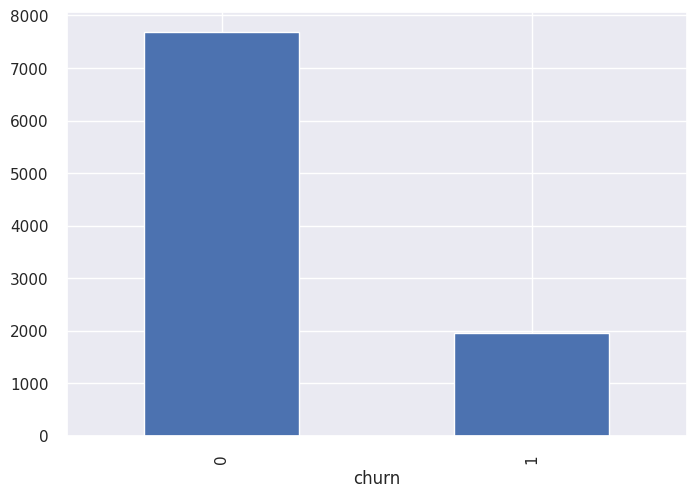

In [ ]:
dataScaled['churn'] = dataRaw['churn']
dataScaled['churn'].value_counts().plot(kind='bar')

In [ ]:
# Định nghĩa X và y

X = dataScaled[dataScaled.columns.difference(['churn'])]
y = dataScaled[['churn']]

# Data Preprocessing

### Xử lý thiên lệch dữ liệu

In [ ]:
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X, y)

<Axes: xlabel='churn'>

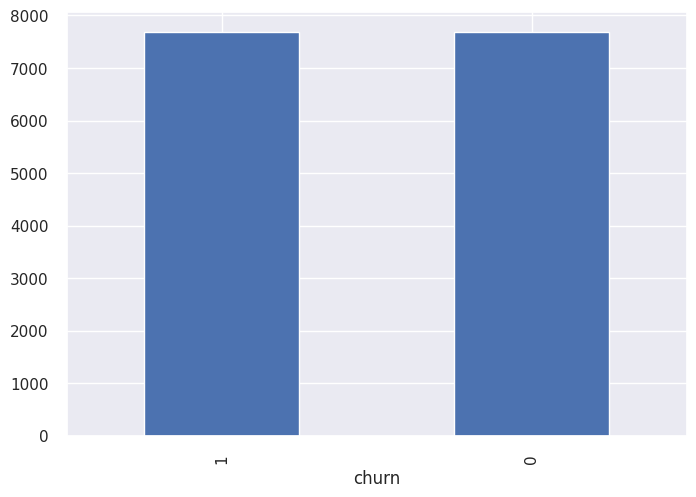

In [ ]:
# Sau khi sử dụng SMOTE để giải quyết vấn đề thiên lệch dữ liệu
y_res['churn'].value_counts().plot(kind='bar')

**Note**

Với bộ dữ liệu đã xử lý bất cân bằng, có thể thấy rằng vài features có mối tương quan với nhau khá lớn, cần cân nhắc loại bỏ bớt các feature không cần thiết bằng cách:

- Loại bỏ thủ công dựa vào Domain Knowledge hoặc khảo sát kỹ hơn về mặt dữ liệu.

- Sử dụng attribute ```feature_importance_``` của Decision Tree
    
- Sử dụng ```RFE``` (Bản chất cũng dựa vào ```feature_importance_``` hoặc ```coef_```)

- Giảm chiều dữ liệu ```LDA, NCA, PCA```

### Lựa chọn features

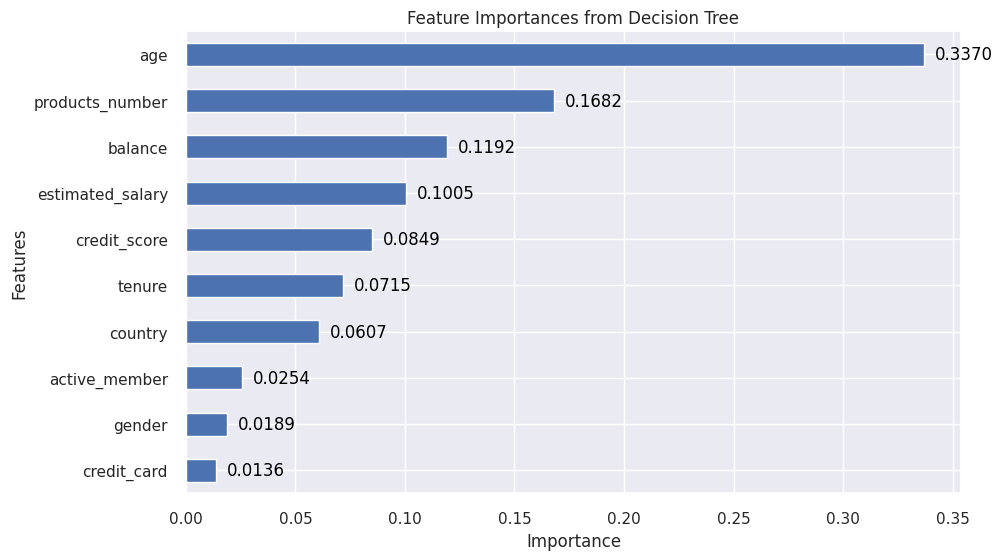

In [ ]:
# Đã huấn luyện mô hình DecisionTreeClassifier và lấy importance của các đặc trưng
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_res, y_res)

# Vẽ barh cho feature importances
importances = tree.feature_importances_
feature_names = list(X_res.columns)
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ barh
ax = pd.Series(importances, index=feature_names).sort_values().plot(kind='barh')

# Thêm số vào mỗi bar
for i, v in enumerate(ax.patches):
    ax.text(v.get_width() + 0.005, v.get_y() + v.get_height() / 2, f'{v.get_width():.4f}',
            ha='left', va='center', color='black', fontsize=12)

# Cải thiện giao diện
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


**Note**

Tạm thời có thể chọn các features có giá trị lớn hơn 5%, bao gồm 7 yếu tố:
- Age
- Products Number
- Balance
- Estimated Salary
- Credit score
- Tenure
- Country

Có thể hiểu rằng, việc churn với ngân hang ABC dựa vào độ tuổi, ....

### Giảm chiều dữ liệu

In [ ]:
# lượng dữ liệu giảm có thể tùy chỉnh
n_comp = 7 # nén thông tin từ 10 features > 7 main features trên không gian dữ liệu khác

nca = NeighborhoodComponentsAnalysis(n_components = n_comp)
lda = LinearDiscriminantAnalysis(n_components = 1) # n_components cannot be larger than min(n_features, n_classes - 1)
pca = PCA(n_components = n_comp)

nca.fit(X_res, y_res)
lda.fit(X_res, y_res)
pca.fit(X_res)

PCA(n_components=7)

# Modeling

### Data Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

### Model train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import lightgbm as lgb

In [ ]:
!pip install --upgrade xgboost

In [ ]:
logistic = LogisticRegression(random_state=0)
bayes = GaussianNB()
knn = KNeighborsClassifier()
adaboost = AdaBoostClassifier(random_state=0)
randomForest = RandomForestClassifier(random_state=0)
grad = GradientBoostingClassifier(subsample=0.7, n_estimators=100)
lgbm_model = lgb.LGBMClassifier()

In [ ]:
modelList = {"Logistic": logistic,
             "Naive Bayes": bayes,
             "KNN": knn,
             "AdaBoost": adaboost,
             "Random Forest": randomForest,
             "LGM": lgb,
             "GradientBoosting": grad
             }

reduceDimList = {"NCA": nca,
                 "LDA": lda,
                 "PCA": pca}

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

scoring = ['precision_macro', 'recall_macro', 'f1_macro']

for name_rd, rd in reduceDimList.items():
    for name_model, model in modelList.items():
        print(f"Running model {name_model} on method {name_rd}")
        scores = cross_validate(model, rd.transform(X_train), y_train, scoring=scoring, cv = 5)
        print("F1 Score %0.2f accuracy with a standard deviation of %0.2f" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))
        print("=========================================================================================")

Running model Logistic on method NCA
F1 Score 0.73 accuracy with a standard deviation of 0.00
Running model Naive Bayes on method NCA
F1 Score 0.72 accuracy with a standard deviation of 0.01
Running model KNN on method NCA
F1 Score 0.82 accuracy with a standard deviation of 0.01
Running model AdaBoost on method NCA
F1 Score 0.73 accuracy with a standard deviation of 0.01
Running model Random Forest on method NCA
F1 Score 0.84 accuracy with a standard deviation of 0.00
Running model LGM on method NCA
[LightGBM] [Info] Number of positive: 4253, number of negative: 4344
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 8597, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494707 -> initscore=-0.021171
[LightGBM] [Info] Start training from score -0.021171
[Ligh

> Method: NCA (Neighborhood Component Analysis)
  - Logistic Regression: F1 Score = 0.73, Accuracy = 0.73 (std dev = 0.00)
  - Naive Bayes: F1 Score = 0.72, Accuracy = 0.72 (std dev = 0.01)
  - KNN (K-Nearest Neighbors): F1 Score = 0.82, Accuracy = 0.82 (std dev = 0.01)
  - AdaBoost: F1 Score = 0.73, Accuracy = 0.73 (std dev = 0.01)
  - Random Forest: F1 Score = 0.84, Accuracy = 0.84 (std dev = 0.00)
  - LightGBM: F1 Score = 0.80, Accuracy = 0.80 (std dev = 0.01)
  - GradientBoosting: F1 Score = 0.77, Accuracy = 0.77 (std dev = 0.01)

> Method: LDA (Linear Discriminant Analysis)
  - Logistic Regression: F1 Score = 0.73, Accuracy = 0.73 (std dev = 0.00)
  - Naive Bayes: F1 Score = 0.73, Accuracy = 0.73 (std dev = 0.00)
  - KNN: F1 Score = 0.69, Accuracy = 0.69 (std dev = 0.01)
  - AdaBoost: F1 Score = 0.72, Accuracy = 0.72 (std dev = 0.00)
  - Random Forest: F1 Score = 0.64, Accuracy = 0.64 (std dev = 0.01)
  - LightGBM: F1 Score = 0.72, Accuracy = 0.72 (std dev = 0.01)
  - GradientBoosting: F1 Score = 0.72, Accuracy = 0.72 (std dev = 0.01)

> Method: PCA (Principal Component Analysis)
- Logistic Regression: F1 Score = 0.72, Accuracy = 0.72 (std dev = 0.00)
- Naive Bayes: F1 Score = 0.73, Accuracy = 0.73 (std dev = 0.00)
- KNN: F1 Score = 0.81, Accuracy = 0.81 (std dev = 0.00)
- AdaBoost: F1 Score = 0.75, Accuracy = 0.75 (std dev = 0.01)
- Random Forest: F1 Score = 0.84, Accuracy = 0.84 (std dev = 0.00)
- LightGBM: F1 Score = 0.79, Accuracy = 0.79 (std dev = 0.01)

**NOTE**
 Chọn mô hình gì?

Observations
> Best performance: The Random Forest model consistently yields the highest performance across all methods (NCA, LDA, PCA) with an F1 Score of 0.84 for NCA and PCA, and 0.64 for LDA.

> KNN: The KNN model performs well with a high F1 Score of 0.82 on NCA and 0.81 on PCA, making it a strong performer.

> LightGBM: LightGBM shows strong results with an F1 Score of 0.80 on NCA and 0.79 on PCA but performs similarly to Random Forest and KNN.




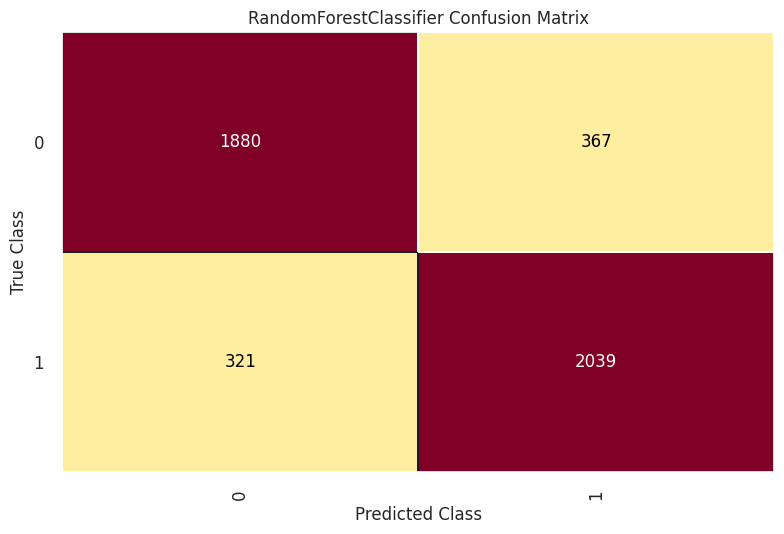

<Figure size 800x550 with 0 Axes>

In [ ]:
classes=[0, 1]

confusion_matrix(
    randomForest,
    nca.transform(X_train), y_train, nca.transform(X_test), y_test,
    classes=classes
)
plt.tight_layout()

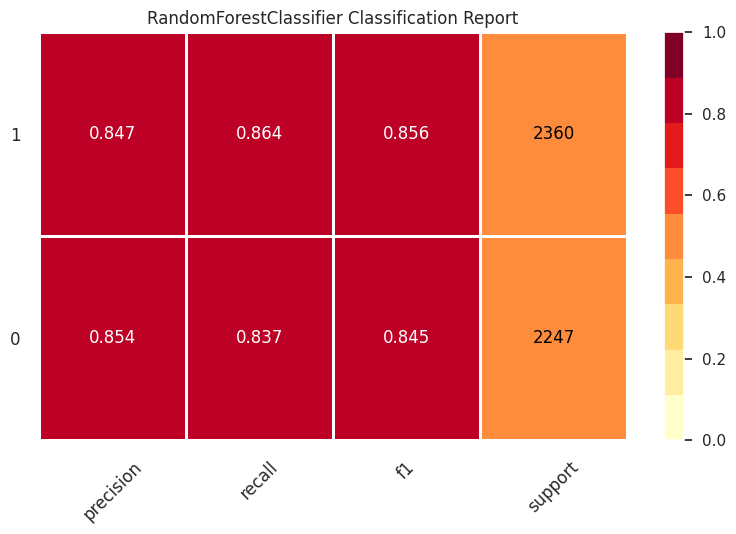

In [ ]:
visualizer = ClassificationReport(randomForest, classes=classes, support=True)
visualizer.fit(nca.transform(X_train), y_train)
visualizer.score(nca.transform(X_test), y_test)
visualizer.show();


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

# Khởi tạo các mô hình cơ sở
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

# Tạo VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('knn', knn),
    ('lgbm', lgbm)
], voting='soft')  # Chọn 'soft' cho voting dựa trên xác suất

# Đào tạo mô hình
voting_clf.fit(X_train, y_train)

# Dự đoán với tập kiểm tra
y_pred = voting_clf.predict(X_test)

# Đánh giá hiệu suất
from sklearn.metrics import f1_score
print(f"F1 Score: {f1_score(y_test, y_pred)}")


[LightGBM] [Info] Number of positive: 5317, number of negative: 5430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1833
[LightGBM] [Info] Number of data points in the train set: 10747, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494743 -> initscore=-0.021030
[LightGBM] [Info] Start training from score -0.021030
F1 Score: 0.9060079547833368


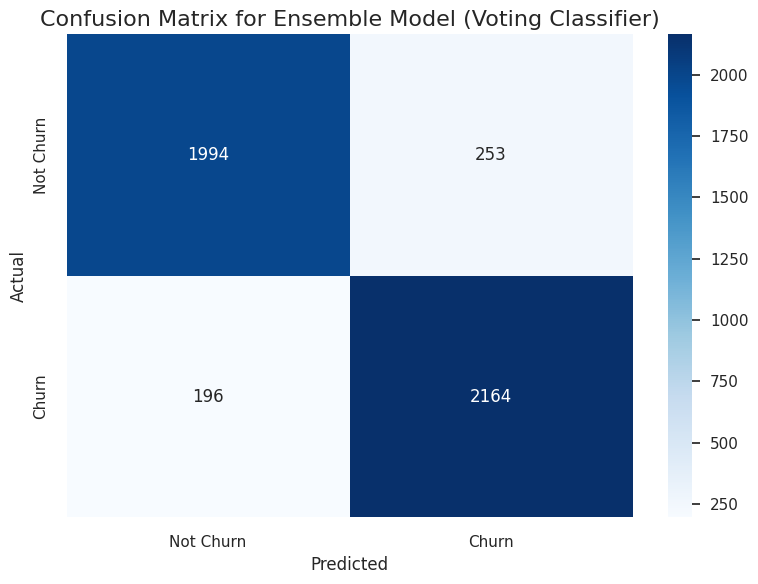

In [ ]:
from sklearn.metrics import confusion_matrix

# Tính toán Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ Confusion Matrix dưới dạng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix for Ensemble Model (Voting Classifier)", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()  # Đảm bảo không bị cắt góc
plt.show()


- Sau khi thử nghiệm các mô hình khác nhau như Random Forest, KNN và LightGBM, nhận thấy rằng mô hình LightGBM cho kết quả tốt nhất với F1 Score = 0.906, chứng tỏ đây là lựa chọn tối ưu cho bài toán phân loại hiện tại.
- Tuy nhiên, để cải thiện thêm, có thể tiếp tục thử nghiệm với việc tối ưu hóa tham số và kết hợp mô hình để đảm bảo tính hiệu quả trong các tình huống thực tế."

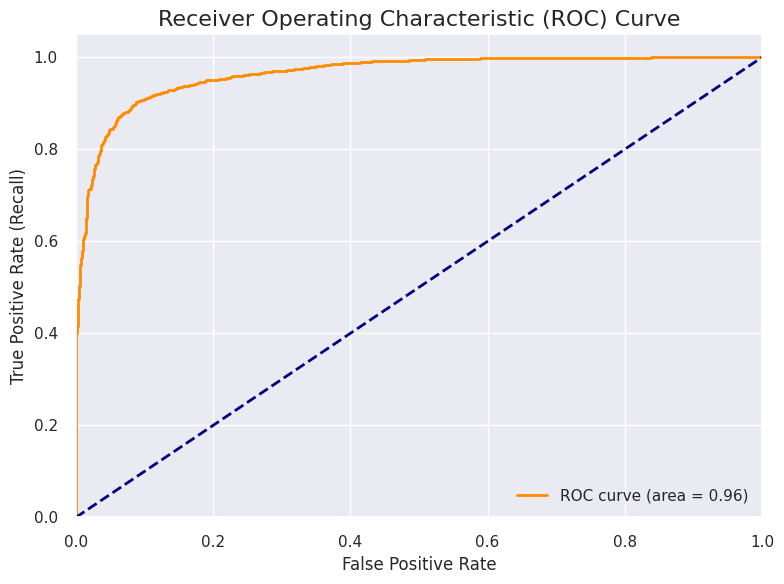

In [ ]:
from sklearn.metrics import roc_curve, auc

# Tính toán fpr, tpr và auc
fpr, tpr, _ = roc_curve(y_test, voting_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


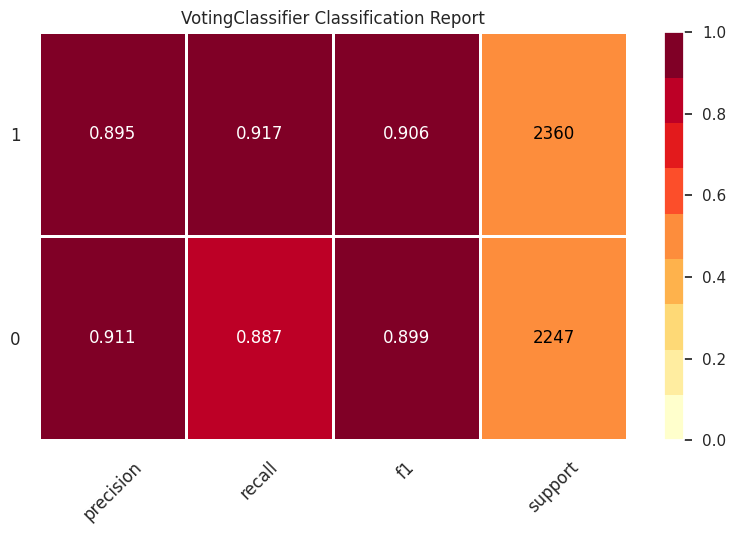

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [ ]:
# Tạo đối tượng ClassificationReport từ Yellowbrick
visualizer = ClassificationReport(voting_clf, classes=[0, 1], support=True)

# Huấn luyện và trực quan hóa trên dữ liệu huấn luyện và kiểm tra
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Hiển thị kết quả
visualizer.show()

# Conclusion

**Trong notebook này**

1. Thực hiện làm sạch dữ liệu:
2. Phân tích dữ liệu và thấy rằng:

>  Tìm Hiểu Lý Do Tại Sao Khách Hàng Đức Dễ Rời Bỏ? Do khả năng cạnh tranh khu vực kém, thói quen tài chính đặc thù tại Đức?
  - Cạnh Tranh Khu Vực Yếu: Đánh giá xem vị thế cạnh tranh của ngân hàng tại Đức có yếu hơn so với các tổ chức tài chính địa phương hay không. Đưa ra các dịch vụ có tính cạnh tranh cao hơn hoặc cải thiện dịch vụ tại khu vực này có thể giúp giữ chân khách hàng.
  - Thói Quen Tài Chính Đặc Thù: Nghiên cứu thói quen tài chính đặc biệt của khách hàng Đức, chẳng hạn như sự ưu tiên cho các sản phẩm tài chính ít rủi ro hoặc ổn định hơn.
  
> Kiểm tra xem có mâu thuẫn giữa các sản phẩm và dịch vụ tài chính hay không, vì việc sử dụng nhiều dịch vụ có thể dẫn đến tỷ lệ rời bỏ cao hơn.

> Đa dạng hóa các hoạt động dành cho thành viên để tăng cường sự gắn kết và tham gia của khách hàng, giúp giảm tỷ lệ churn.

> Cải thiện sức cạnh tranh của các dịch vụ dành cho phụ nữ và khách hàng trung niên. Đồng thời, đề xuất thu thập thêm dữ liệu từ phòng marketing để phân tích các lý do tiềm năng cho từng phân khúc khách hàng

3. Sử dụng các mô hình phân loại để dự đoán phân loại các khách hàng churn

- Mô hình này sử dụng phương pháp **Ensemble Learning** với **Voting Classifier** để kết hợp các mô hình học máy khác nhau (**RandomForest, KNeighbors, LightGBM**) nhằm tối ưu hóa khả năng phân loại và đưa ra kết quả chính xác hơn với F1 score 90,6%
> Sử dụng mô hình dự đoán churn làm tham chiếu để giúp ngân hàng xác định những khách hàng có nguy cơ rời bỏ dịch vụ.

4. Có thể thấy rằng ML sẽ được dùng trong cả quá trình EDA để làm rõ các insight của dữ liệu.